# TFM Big Data Analytics

## Carga y unificación de los datos

Virginia Casino Sánchez (vircasan20@gmail.com)

- Carga datos
- Preproceso datos
- Unificación datos

## Librerías

In [47]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from sklearn.preprocessing import RobustScaler

import warnings
warnings.filterwarnings('ignore')

## Constantes

In [48]:
CHLA = 'chla'
CHLA_MEAN = 'chla_mean'
CHLA_MAX = 'chla_max'
CHLA_MIN = 'chla_min'

TURB = 'turb'
TURB_MEAN = 'turb_mean'
TURB_MAX = 'turb_max'
TURB_MIN = 'turb_min'

KD = 'kd'
DATE = 'date'

CHL_NN = 'chl_nn'
CHL_OC = 'chl_oc'
TSM = 'tsm'
TAG = 'tag'

DATE_FORMAT = '%Y-%m-%d'

COLUMNS_SEPARATOR = ','
ENCODING_CODE = 'utf-8'

READ_OPTION = 'r'

CLR_SMARTL = 'darkblue'
CLR_IEO = 'darkgreen'
CLR_CARM = 'darkred'
CLR_ESA = 'yellow'

CLR_CHLA = 'seagreen'
CLR_TURB = 'cornflowerblue'
CLR_KD = 'darkorchid'
CLR_TSM = 'red'

### - Boya

In [49]:
B_FILE_PATH = r'.\data\Originales\MarMenorIP_Output60min.dat'
B_CSV_PATH = 'buoy_data.csv'

### - CARM

In [50]:
C_FILE_PATH = r'.\data\Originales\CARM_CTD_2022-02-22_2023-02-02.csv'
C_CSV_PATH = 'carm_data.csv'

### - IEO

In [51]:
I_FILE_PATH = r'.\data\Originales\SERIE TEMPORAL DMMEM.xlsx'
I_CSV_PATH = 'ieo_data.csv'

### - SATELITE

In [52]:
S_FILE_PATH = r'.\data\Originales\CDT6_Mar_Menor_S3A_OL.csv'
S_CSV_PATH = 'satelite_data.csv'

## Métodos

### - Comúnes

In [53]:
def drop_nan(data):
    nan_values = data.shape[0]
    # data = data.dropna()
    data = data.dropna(subset=[col for col in data.columns if col != DATE], how='all')


    return data

In [54]:
def pintar_grafica_linea_temporal(titulo, datos, label_x, label_y, file_name, alt_max_inset, alt_min_inset):
    # Declaración variables
    ancho = 20 
    alto = 10

    label_x = 'Fecha'
    label_y = 'Clorofila (mg/m3)'
    titulo = titulo

    colores = [CLR_CHLA, CLR_TURB, CLR_KD, CLR_TSM,"blue", "green", "red", "yellow"]

    file_name = f'figuras/evolucion_chla_{file_name}.svg'

    # Preparación datos
    data = datos.copy()

    data = data.set_index(DATE)

    columnas = data.columns 

    # Preparación gráfica
    fig, ax = plt.subplots(figsize=(ancho, alto))

    for i, columna in enumerate(columnas):
        ax.plot(data.index, data[columna], color=colores[i])

    # Configuración a los ejes / grid
        # Color de fondo
    ax.set_facecolor('white')

        # Configuración del grid
    ax.grid(True, color='lightgrey', linestyle='--', linewidth=0.7, axis='y', which='major')
    ax.yaxis.grid(True, color='lightgrey', linestyle='--', linewidth=0.4, which='minor')

        # Configuración de los ticks del eje y
    ax.yaxis.set_minor_formatter(ticker.NullFormatter())
    ax.yaxis.set_major_locator(ticker.MultipleLocator(15))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(5)) 

    ax.tick_params(axis='y', labelsize=15)

        # Configuración de los ticks del eje x
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=60))  # Cada 5 días
    ax.xaxis.set_major_formatter(mdates.DateFormatter(DATE_FORMAT))
    
    ax.tick_params(axis='x', which='major', labelsize=15, rotation = 90)

    # Configuración de las etiquetas
    ax.set_xlabel(label_x, fontsize=15, labelpad=15)
    ax.set_ylabel(label_y, fontsize=15, labelpad=15)
    # ax.set_title(titulo, fontsize=20, pad=10)

    # Borrar líneas superior y derecha
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Leyenda
    ax.legend(data.columns)

    # Ajustar imagen
    plt.tight_layout()

    # Guardar imagen
    plt.savefig(file_name, format='svg')

    # Mostrar imagen
    plt.show()

Pintar dispersión datos

In [55]:
def pintar_grafica_dispersion(titulo, data, columnas, colores, label_x, label_y, file_name, alt_min_inset, alt_max_inset,y_min_grid, y_max_grid):

    # Declaración variables
    alto = 10
    ancho = 20

    file_name = f'figuras/{file_name}.svg'
    
    # Preparación gráfica
    fig, ax = plt.subplots(figsize=(ancho, alto))

    for i, columna in enumerate(columnas):
        ax.scatter(data.index, data[columna], color=colores[i], s=30, alpha = 0.7)
    
    # Configuración a los ejes / grid
        # Color de fondo
    ax.set_facecolor('white')

        # Configuración del grid
    ax.grid(True, color='lightgrey', linestyle='--', linewidth=0.7, axis='y', which='major')
    ax.yaxis.grid(True, color='lightgrey', linestyle='--', linewidth=0.4, which='minor')

        # Configuración de los ticks del eje y
    ax.yaxis.set_minor_formatter(ticker.NullFormatter())
    ax.yaxis.set_major_locator(ticker.MultipleLocator(y_max_grid))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(y_min_grid)) 

    ax.tick_params(axis='y', labelsize=15)

        # Configuración de los ticks del eje x
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=60))  # Cada 5 días
    ax.xaxis.set_major_formatter(mdates.DateFormatter(DATE_FORMAT))
    
    ax.tick_params(axis='x', which='major', labelsize=15, rotation = 90)

    # Configuración de las etiquetas
    ax.set_xlabel(label_x, fontsize=15, labelpad=15)
    ax.set_ylabel(label_y, fontsize=15, labelpad=15)
    # ax.set_title(titulo, fontsize=20, pad=10)

    # Borrar líneas superior y derecha
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Creación del gráfico inset 
    ax_inset = inset_axes(ax, width='45%', height='42%', loc='upper right')

    # Enfocar en las últimas fechas, por ejemplo, las últimas 10 fechas
    zoom_focus = -296

    for i, columna in enumerate(columnas):
        ax_inset.scatter(data.index[zoom_focus:], data[columna][zoom_focus:], color=colores[i], s=25, alpha = 0.5)

    # Configuración del grid
    ax_inset.grid(True, color='lightgrey', linestyle='--', linewidth=0.7, axis='y', which='major')
    ax_inset.yaxis.grid(True, color='lightgrey', linestyle='--', linewidth=0.4, which='minor')

        # Configuración de los ticks del eje y
    ax_inset.yaxis.set_major_locator(ticker.MultipleLocator(1))   # Ticks mayores cada 1
    ax_inset.yaxis.set_minor_locator(ticker.MultipleLocator(0.5)) # Ticks menores cada 0.5

    ax_inset.tick_params(axis='y', labelsize=15)

    ax_inset.set_ylim(alt_min_inset,alt_max_inset)

        # Configuración de los ticks del eje x
    ax_inset.xaxis.set_major_locator(mdates.DayLocator(interval=60))  # Cada 5 días
    ax_inset.xaxis.set_major_formatter(mdates.DateFormatter(DATE_FORMAT))
    
    ax_inset.tick_params(axis='x', which='major', labelsize=15, rotation = 90)  

    # Borrar líneas superior y derecha
    ax_inset.spines['top'].set_visible(False)
    ax_inset.spines['right'].set_visible(False)

    # Leyenda
    ax.legend(columnas, loc='upper left')

    # Ajustar imagen
    plt.tight_layout()

    # Guardar imagen
    plt.savefig(file_name, format='svg')

    # Mostrar imagen
    plt.show()

### - Boya

In [56]:
def pintar_grafica_comp_var_chla(data_max, data_min, labels):
    # Declaración variables
    ancho = 10 
    alto = 5

    label_x = 'Fecha'
    label_y = 'Clorofila (mg/m3)'
    titulo = 'Comparación Variación Diaria de la Concentración de Clorofila'

    colores = [CLR_SMARTL , 'royalblue']

    file_name = f'figuras/comparacion_variacion_chla.svg'

    # Preparación gráfica
    fig, ax = plt.subplots(figsize=(ancho, alto))

    ax.plot(data_max['hour_str'], data_max[CHLA], color=colores[0], lw = 2)
    ax.plot(data_min['hour_str'], data_min[CHLA], color=colores[1], lw = 2)

    # Configuración a los ejes / grid
        # Color de fondo
    ax.set_facecolor('white')   

        # Configuración del grid
    ax.grid(True, color='lightgrey', linestyle='--', linewidth=0.7)
    
        # Configuración de los ticks del eje y
    ax.yaxis.set_major_locator(ticker.MultipleLocator(2))   # Ticks mayores cada 1
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(1)) # Ticks menores cada 0.5

    ax.tick_params(axis='y', labelsize=20)

        # Configuración de los ticks del eje x
    ax.tick_params(axis='x', labelsize=20, rotation = 90)
    
    # Leyenda
    ax.legend(labels, fontsize=20)

    # Configuración de las etiquetas
    ax.set_xlabel(label_x, fontsize=20, labelpad=15)
    ax.set_ylabel(label_y, fontsize=20, labelpad=15)
    # ax.set_title(titulo, fontsize=20, pad=10)

    # Borrar líneas superior y derecha
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Ajustar imagen
    plt.tight_layout()

    # Guardar imagen
    plt.savefig(file_name, format='svg')

    # Mostrar imagen
    plt.show()

In [57]:
def pintar_grafica_variacion_chla(datos):
    # Declaración variables
    ancho = 20 
    alto = 10

    label_x = 'Fecha'
    label_y = 'Clorofila (mg/m3)'
    titulo = 'Variación Diaria de la Concentración de Clorofila'

    colores = CLR_SMARTL

    file_name = f'figuras/variacion_diaria_chla.svg'
    
    # Preparación datos
    data = datos.copy()
    
    data[DATE] = pd.to_datetime(data[DATE])

    fecha_inicio = data[DATE].min()
    fecha_inicio_ajustada = fecha_inicio - pd.Timedelta(days=2)

    fecha_final = data[DATE].max()
    fecha_final_ajustada = fecha_final + pd.Timedelta(days=2)

    # Preparación gráfica
    fig, ax = plt.subplots(figsize=(ancho, alto))

    plt.errorbar(data[DATE], data[CHLA_MEAN], yerr=data['chl_std_dev'], 
                 fmt='o', capsize=5, color= colores, lw=1, markersize=5) 
    
    # Configuración a los ejes / grid
        # Color de fondo
    ax.set_facecolor('white')

        # Configuración del grid
    ax.grid(True, color='lightgrey', linestyle='--', linewidth=0.7, axis='y', which='major')
    ax.yaxis.grid(True, color='lightgrey', linestyle='--', linewidth=0.4, which='minor')

        # Configuración de los ticks del eje y
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))  
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.5)) 

    ax.tick_params(axis='y', labelsize=25)

        # Configuración de los ticks del eje x
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=7)) 
    ax.xaxis.set_major_formatter(mdates.DateFormatter(DATE_FORMAT))

    ax.tick_params(axis='x', which='major', labelsize=25, rotation = 90)

    ax.set_xlim(fecha_inicio_ajustada, fecha_final_ajustada)

    # Configuración de las etiquetas
    ax.set_xlabel(label_x, fontsize=30, labelpad=20)
    ax.set_ylabel(label_y, fontsize=30, labelpad=20)
    # ax.set_title(titulo, fontsize=20, pad=10)

    # Borrar líneas superior y derecha
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Ajustar imagen
    plt.tight_layout()

    # Guardar imagen
    plt.savefig(file_name, format='svg')

    # Mostrar imagen
    plt.show()


In [58]:
def analysis_agg_buoy_data(data):
    HOUR = 'hour'
    HOUR_STR = 'hour_str'
    
    # Agrupar los datos por el día
    data_group_day = data.groupby(DATE)

    # Agrupar por día seleccionando el mínimo, máximo, haciendo la media y la desviación
    stats = data_group_day[CHLA].agg(['min', 'max', 'mean', 'std']).reset_index()
    stats.columns = [DATE, CHLA_MIN, CHLA_MAX, CHLA_MEAN, 'chl_std_dev']

    # Pintar gráfica
    pintar_grafica_variacion_chla(stats)

    # Obtener el día con más variabilidad y con menos
    idx_max = stats['chl_std_dev'].idxmax()
    dia_max = stats.loc[idx_max, DATE]

    data_dia_max = data[data[DATE] == dia_max]
    data_dia_max[HOUR_STR] = data_dia_max[HOUR].apply(lambda t: t.strftime('%H:%M'))

    idx_min = stats['chl_std_dev'].idxmin() - 1
    dia_min = stats.loc[idx_min, DATE]
    
    data_dia_min = data[data[DATE] == dia_min] 
    data_dia_min[HOUR_STR] = data_dia_min[HOUR].apply(lambda t: t.strftime('%H:%M'))

    # Pintar gráfica
    labels = [dia_max, dia_min]
    pintar_grafica_comp_var_chla(data_dia_max, data_dia_min,labels)

In [59]:
def get_buoy_data():
    HOUR = 'hour'
    TIME = 'timestamp'
    
    FIRST_LINE_DATA = 398
    CHLA_COL = 34
    TURB_COL = 35

    # Cargar los datos de un fichero .dat
    dataList = []
    f = open(B_FILE_PATH,READ_OPTION)

    dataContent = f.readlines()[FIRST_LINE_DATA:]
    f.close()
    for line in dataContent:
        data = line.split(COLUMNS_SEPARATOR)
        dataList.append([data[0].replace('\"',''), data[CHLA_COL], data[TURB_COL].replace('\n','')])

    # Crear un DataFrame con los datos
    data = pd.DataFrame(dataList, columns=[TIME, CHLA, TURB])

    # Sustituir cadenas NAN por valores NaN
    data.replace('"NAN"', np.nan, inplace=True)

    # Transformar los tipos de datos 
    data[TIME] = \
        pd.to_datetime(data[TIME], format='mixed')
    data[DATE] = \
        data[TIME].dt.strftime(DATE_FORMAT)
    data[HOUR] = \
        pd.DatetimeIndex(data[TIME]).time

    data[CHLA] = data[CHLA].apply(pd.to_numeric)
    data[TURB] = data[TURB].apply(pd.to_numeric)
    

    analysis_agg_buoy_data(data)
    
    # Seleccionar las variables con las que nos quedamos para el dataset final
    data = data[[DATE,CHLA, TURB]]
   
    # Obtener cuantos valores nulos hay
    data = drop_nan(data)

    # Agrupar fechas realizando la media y reiniciar el indice
    data = data.groupby(DATE).agg(
        chla_max=(CHLA, 'max'),
        chla_min=(CHLA, 'min'),
        chla_mean=(CHLA, 'mean'),
        turb_max=(TURB, 'max'),
        turb_min=(TURB, 'min'),
        turb_mean=(TURB, 'mean')
    ).reset_index()

    # Pintar datos
    pintar_grafica_linea_temporal("Datos SMART LAGOON", data, "", "", "", 10, 10)

    # Añadir etiqueta organización
    data[TAG] = 'SMARTLAGOON'

    # Poner como índice la fecha
    # data = data.set_index(DATE)

    # Generar un csv con los nuevos datos
    # data.to_csv(B_CSV_PATH, sep=COLUMNS_SEPARATOR, encoding=ENCODING_CODE, index=False)

    return data

### - CARM

In [60]:
def get_carm_data():
    # Cargar los datos de un fichero .csv en un DataFrame
    data = pd.read_csv(C_FILE_PATH)

    # Seleccionar solo las columnas con las que se van a trabajar
    data = data[[DATE,'clorofila','turbidez','meas_point','cast']]

    # Renombrar la columna clorofila
    data.rename(columns={'clorofila':CHLA, 'turbidez':TURB}, inplace=True)

    # Seleccionar solo aquellos datos cuyo meas_point == E06 y cast == 3-4 m
    data = data[data['meas_point'].str.contains('E06')]
    data = data[data['cast'].str.contains('3 - 4m')]
    
    # Transformar los tipos de datos
    data[DATE] = pd.to_datetime(data[DATE]).dt.strftime(DATE_FORMAT)
    
    data[CHLA] = data[CHLA].apply(pd.to_numeric)
    data[TURB] = data[TURB].apply(pd.to_numeric)

    # Seleccionar las variables con las que nos quedamos para el dataset final
    data = data[[DATE, CHLA, TURB]]
   
    # Obtener cuantos valores nulos hay
    data = drop_nan(data)

    # Reiniciar el indice
    data = data.reset_index(drop = True)

    # Pintar datos
    pintar_grafica_linea_temporal("Datos CARM", data, "", "", "", 10, 10)
    
    # Añadir etiqueta organización
    data[TAG] = 'CARM'


    # Poner como índice la fecha
    # data = data.set_index(DATE)

    # Generar un csv con los nuevos datos
    # data.to_csv(C_CSV_PATH, sep=COLUMNS_SEPARATOR, encoding=ENCODING_CODE, index=False)

    return data

### - IEO

In [61]:
def get_ieo_data():
    TIME = 'timestamp'
    # Cargar los datos de un fichero .xlsl a un DataFrame
    data = pd.read_excel(I_FILE_PATH, index_col=False, header=None)

    # Eliminar información innecesaria
    data = data.drop(labels=range(0,8), axis=0)
    data = data.drop(data.iloc[:,10:], axis=1)
    data = data.drop(data.columns[1], axis=1)
    data = data.drop(data.iloc[:,2:8], axis=1)

    # Seleccionar solo las columnas con las que se van a trabajar
    data.columns = [TIME, CHLA, KD]
    
    # Transformar los tipos de datos
    data[TIME] = pd.to_datetime(data[TIME])
    data[DATE] = data[TIME].dt.strftime(DATE_FORMAT)

    data[CHLA] = data[CHLA].apply(pd.to_numeric)
    data[KD] = data[KD].apply(pd.to_numeric)

    # Seleccionar las variables con las que nos quedamos para el dataset final
    data = data[[DATE, CHLA, KD]]

    # Obtener cuantos valores nulos hay
    data = drop_nan(data)

    # Reiniciar el indice
    data = data.reset_index(drop = True)

    # Pintar datos
    pintar_grafica_linea_temporal("Datos IEO", data, "", "", "", 10, 10)

    # Añadir etiqueta organización
    data[TAG] = 'IEO'
    

    # Poner como índice la fecha
    # data = data.set_index(DATE)

    # Generar un csv con los nuevos datos
    # data.to_csv(I_CSV_PATH, sep=COLUMNS_SEPARATOR, encoding=ENCODING_CODE, index=False)

    return data

### - SATELITE

In [62]:
def get_satelite_data():
    # Cargar los datos de un fichero .csv en un DataFrame
    data = pd.read_csv(S_FILE_PATH)

    # OBTENER UBICACIONES SATELITES
    # data['ubicacion'] = data['lat'].astype(str) + ',' + data['lon'].astype(str)
    # ubicaciones = data['ubicacion'].unique()
    # np.savetxt('ubicaciones_satelite.csv', ubicaciones, delimiter=',', fmt='%s')

    # Seleccionar solo las columnas con las que se van a trabajar
    data = data[[DATE, CHL_NN, CHL_OC, 'tsm_nn', 'kd490']]

    # Renombrar las columnas de la turbidez
    data.rename(columns={'tsm_nn': TSM, 'kd490': KD}, inplace=True)

    # Sustituir cadenas NAN por valores NaN
    data.replace('--', np.nan, inplace=True)

    # Transformar los tipos de datos
    data[DATE] = pd.to_datetime(data[DATE]).dt.strftime(DATE_FORMAT) 
    
    data[CHL_NN] = data[CHL_NN].apply(pd.to_numeric)
    data[CHL_OC] = data[CHL_OC].apply(pd.to_numeric)
    data[TSM] = data[TSM].apply(pd.to_numeric)
    data[KD] = data[KD].apply(pd.to_numeric)

    # Obtener cuantos valores nulos hay
    data = drop_nan(data)

    # Pintar datos
    pintar_grafica_linea_temporal("Datos ESA", data, "", "", "", 10, 10)

    # Añadir etiqueta organización
    data[TAG] = 'SATELITE'

  

    # Poner como índice la fecha
    # data = data.set_index(DATE)

    # Generar un csv con los nuevos datos
    # data.to_csv(S_CSV_PATH, sep=COLUMNS_SEPARATOR, encoding=ENCODING_CODE, index=False)

    return data

## Carga de datos

### - Boya

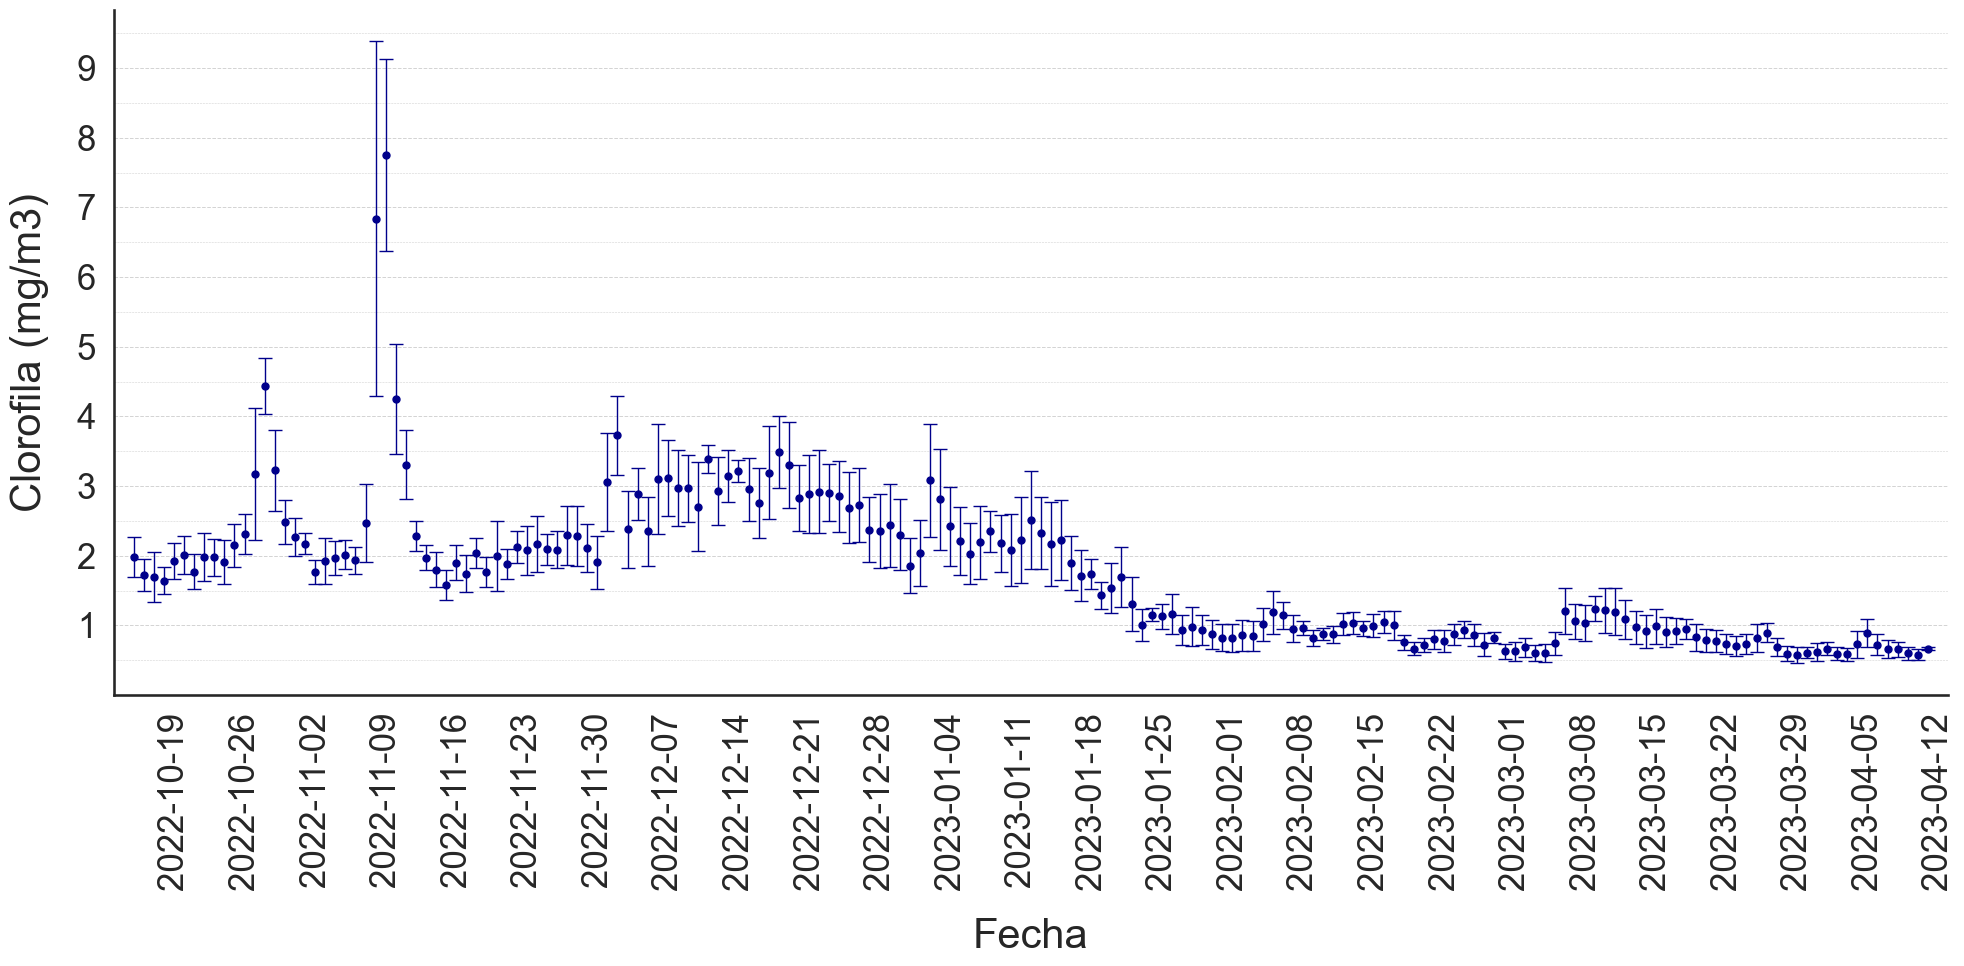

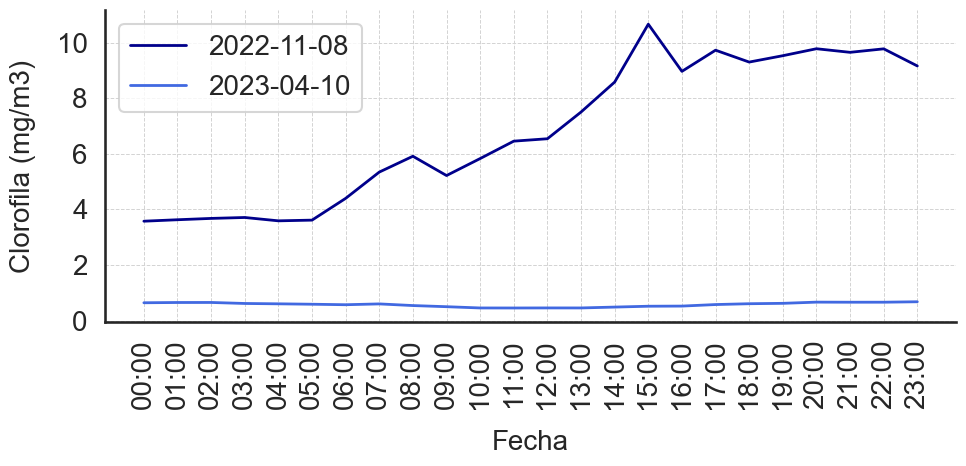

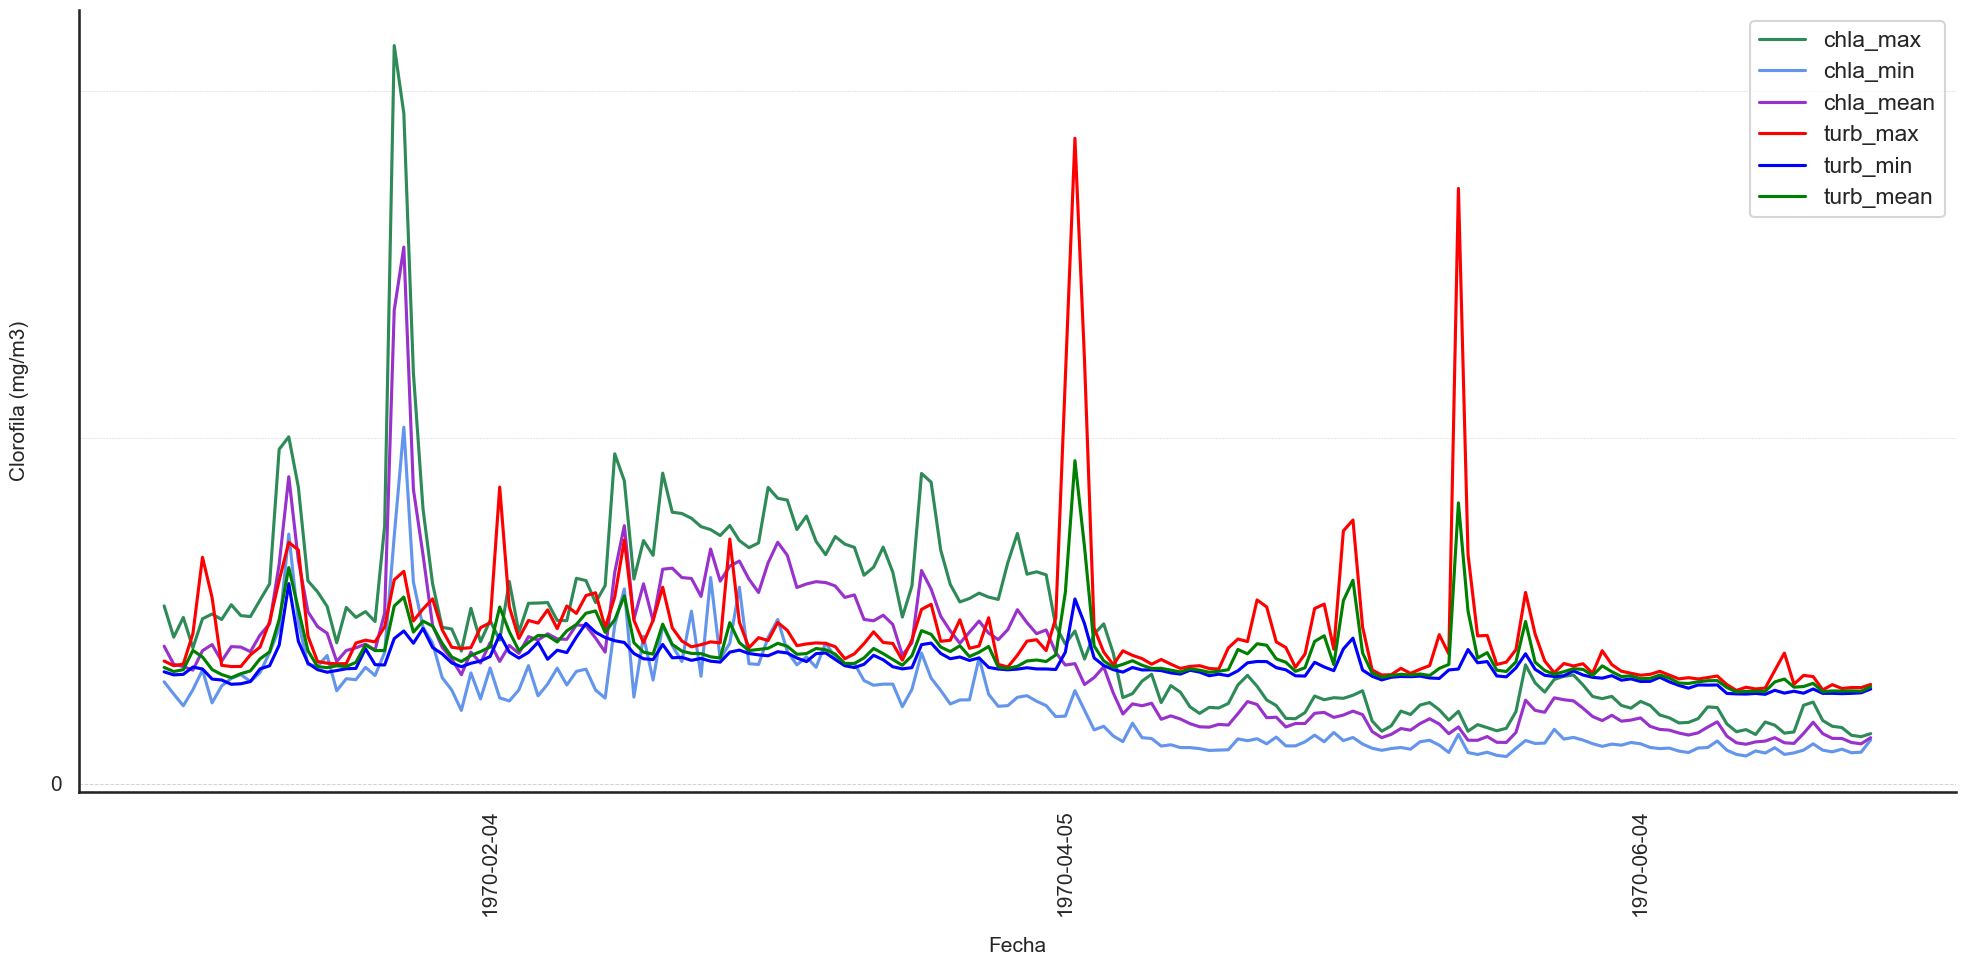

In [63]:
buoy_data = get_buoy_data()

### - CARM

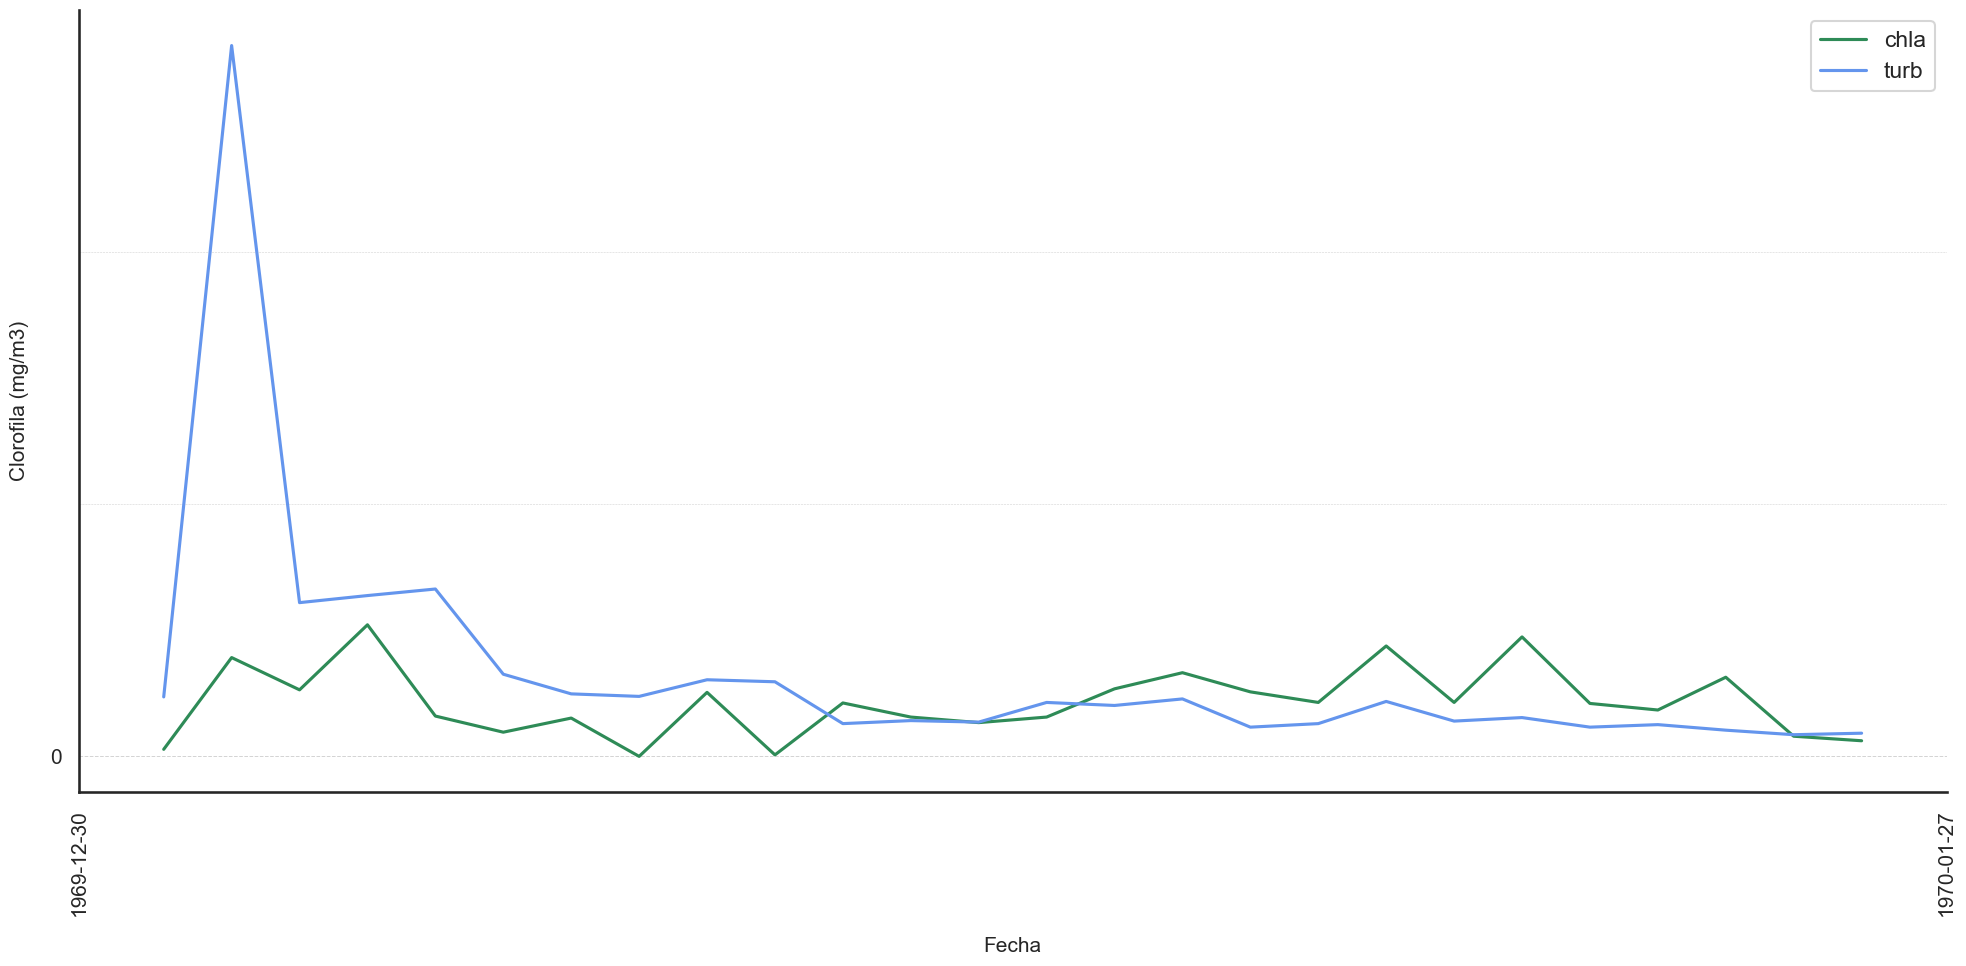

In [64]:
carm_data = get_carm_data()

### - IEO

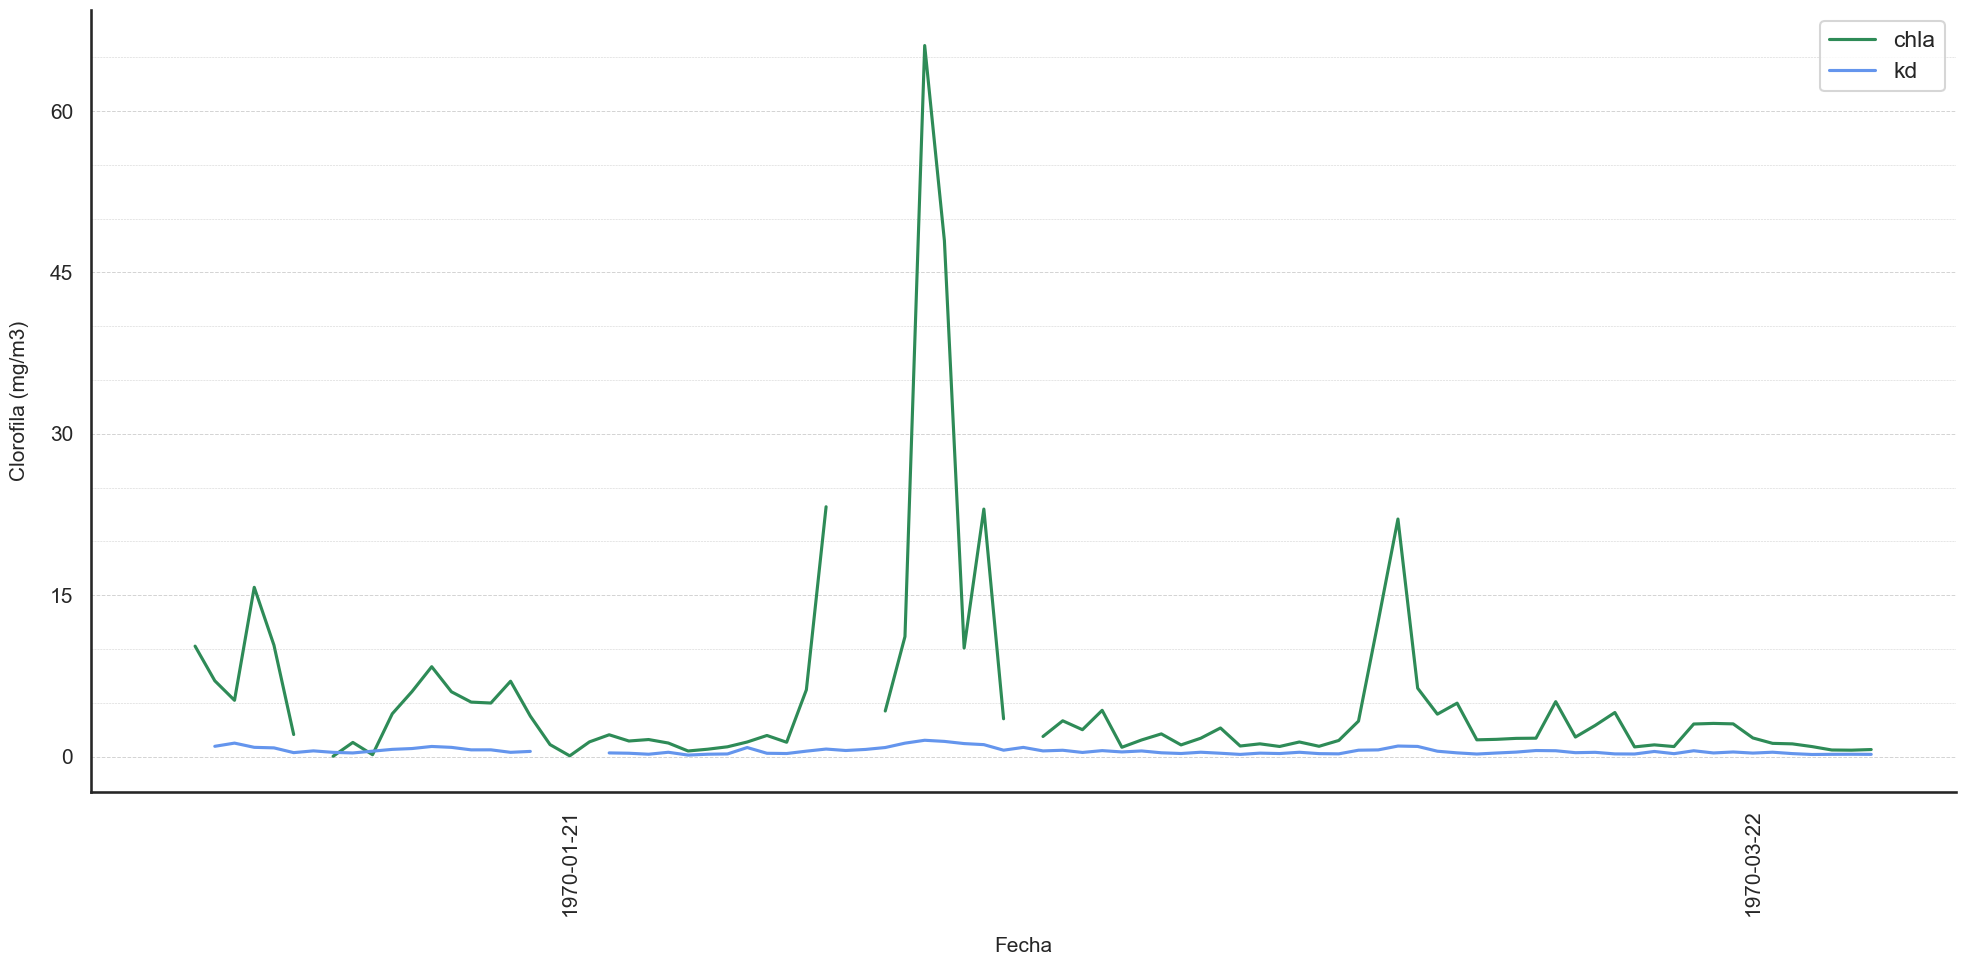

In [65]:
ieo_data = get_ieo_data()

### - SATELITE

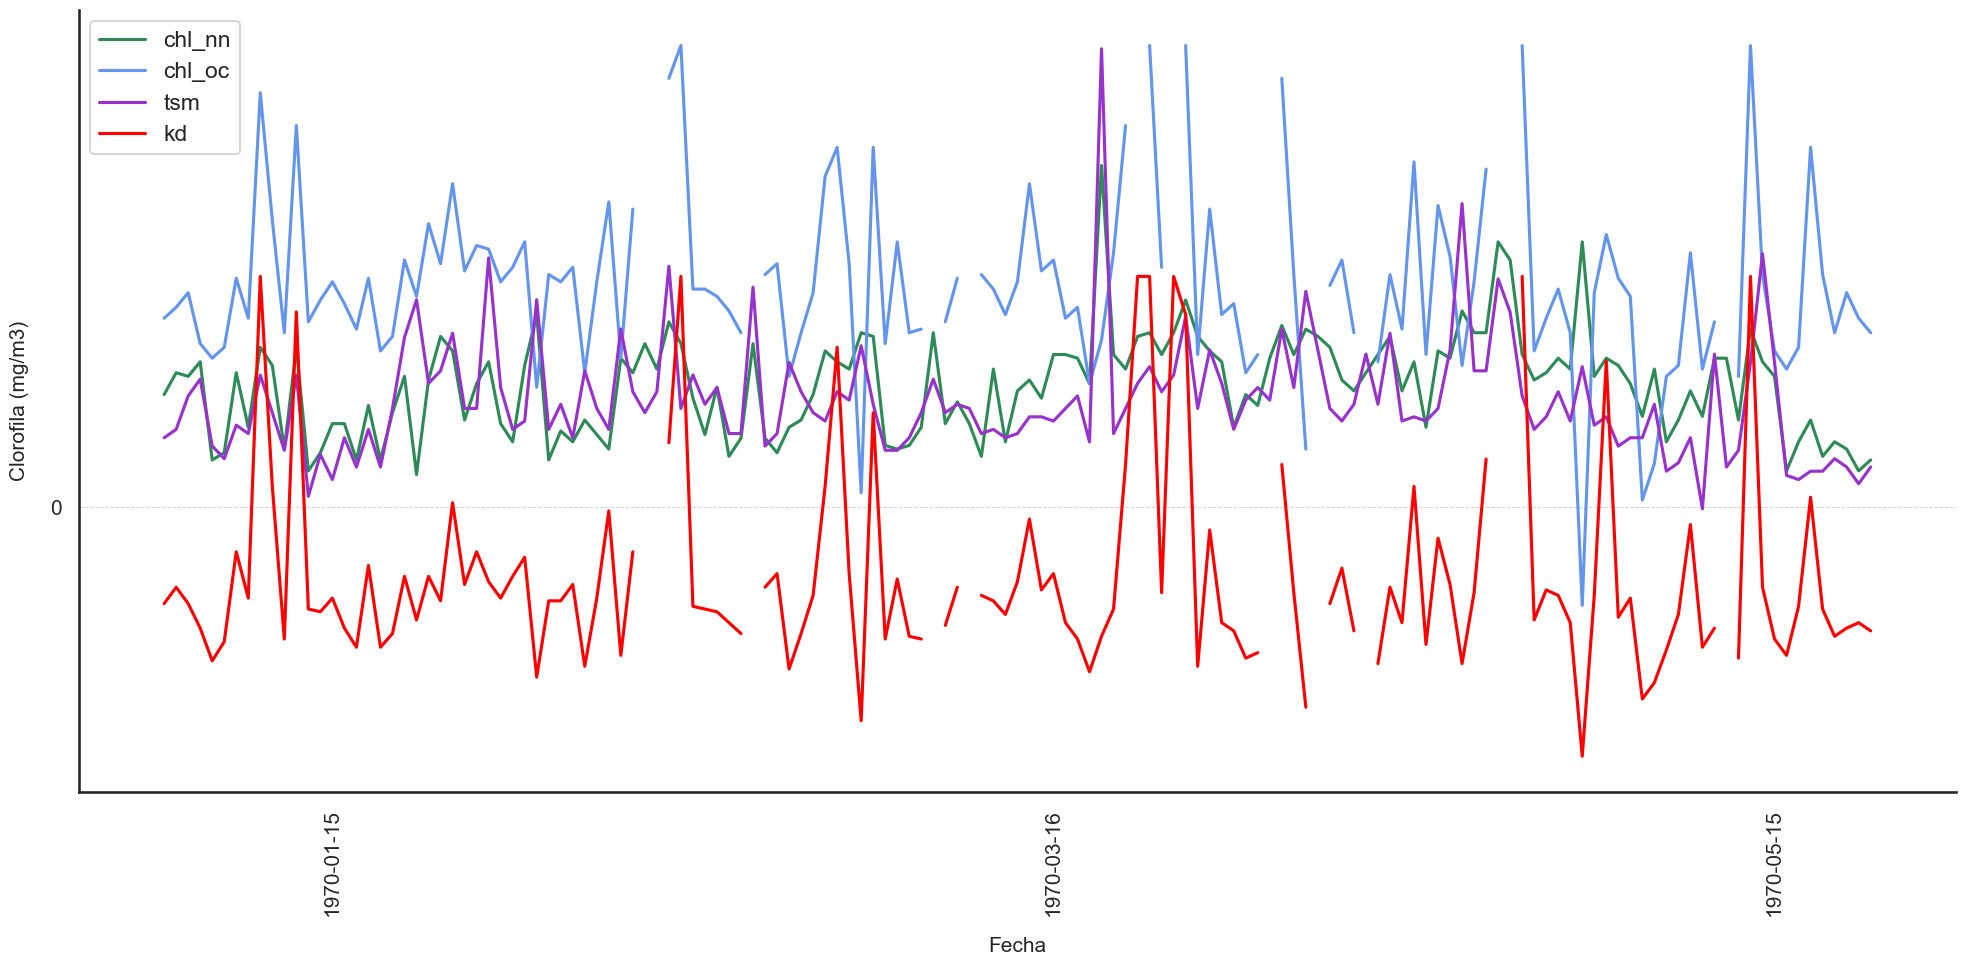

In [66]:
satelite_data = get_satelite_data()

In [88]:
def pintar_eje_temporal_org_fechas():
    # Declaración variables
    ancho = 10 
    alto = 5

    label_x = 'Fecha'
    label_y = 'Clorofila (mg/m3)'
    titulo = 'Eje Temporal Datación de los Datos para cada Organismo'

    colores = [CLR_IEO, CLR_ESA, CLR_CARM, CLR_SMARTL]

    file_name = f'figuras/datacion_organismos.svg'

    # Preparación datos
    datos = {
        'Variable': ['IEO', 'ESA', 'CARM', 'SMART'],
        'Inicio': ['2016-05-15', '2022-01-10', '2022-03-08', '2022-10-15'],
        'Fin': ['2023-03-16', '2023-03-23', '2023-02-01', '2023-04-11']
    }

    df = pd.DataFrame(datos)
    df['Inicio'] = pd.to_datetime(df['Inicio'])
    df['Fin'] = pd.to_datetime(df['Fin'])

    # Preparación gráfica
    fig, ax = plt.subplots(figsize=(ancho, alto))

    for i, row in df.iterrows():
        ax.plot([row['Inicio'], row['Fin']], [i, i], color=colores[i], marker='', linewidth=15)

    # Configuración a los ejes / grid
        # Color de fondo
    ax.set_facecolor('white')

        # Configuración del grid
    ax.grid(True, color='lightgrey', linestyle='--', axis = 'x', linewidth=0.7)
    
        # Configuración de los ticks del eje y
    ax.set_yticks(range(len(df)))
    ax.set_yticklabels(df['Variable'])

        # Configuración de los ticks del eje x
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

    # Ajustar límites
    ax.set_xlim([pd.to_datetime('2016-01-01'), pd.to_datetime('2024-01-01')])

    # Configuración de las etiquetas
    ax.set_xlabel(label_x, fontsize=20, labelpad=15)
    # ax.set_title(titulo, fontsize=20, pad=10)

    # Borrar líneas superior y derecha
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)

    # Ajustar imagen
    plt.tight_layout()

    # Guardar imagen
    plt.savefig(file_name, format='svg')

    # Mostrar imagen
    plt.show()


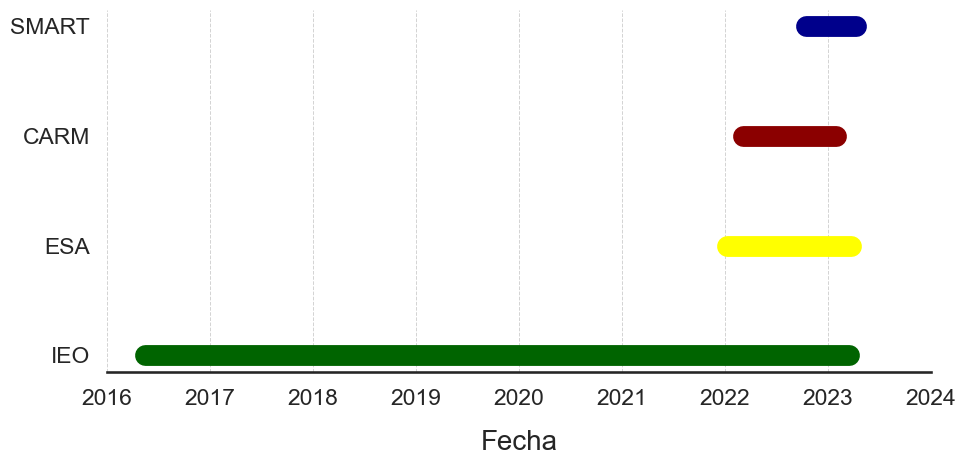

In [89]:
pintar_eje_temporal_org_fechas()

#### Cajas y bigotes 

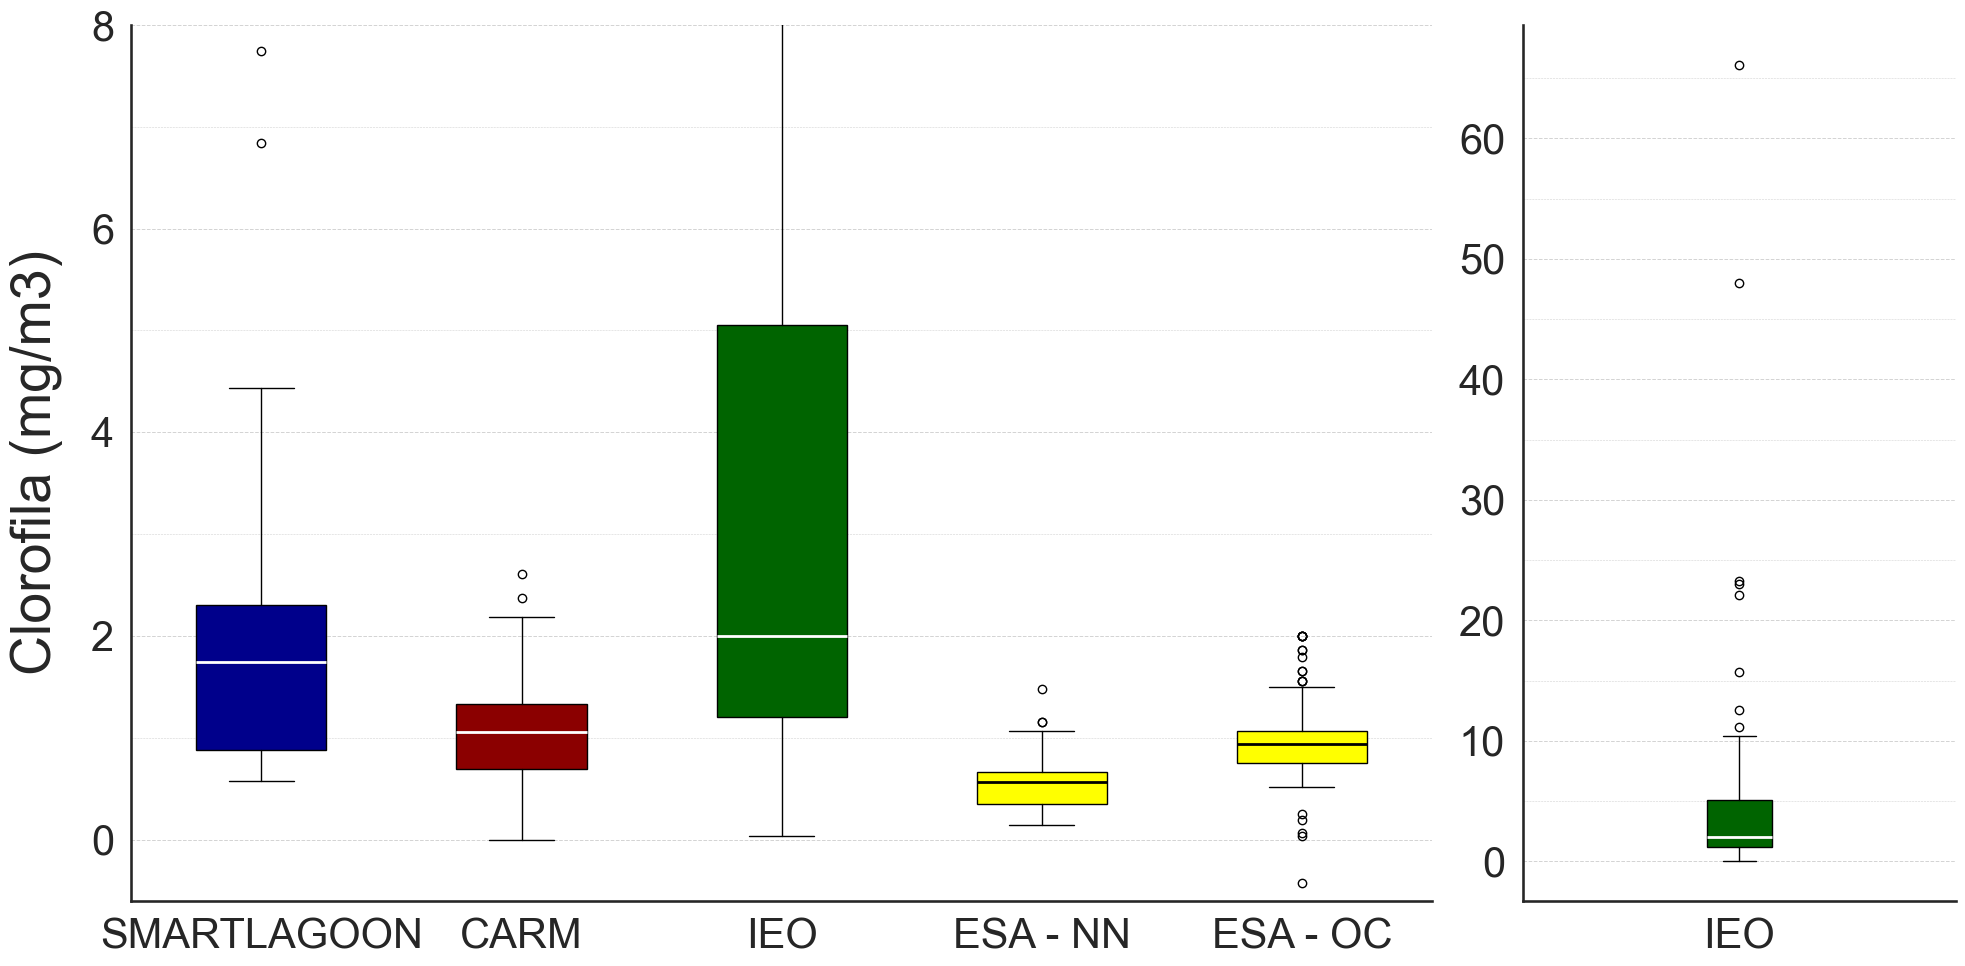

In [69]:
def pintar_grafica_estadisticos_datos_chla(buoy_data, carm_data, ieo_data, satelite_data):
    # Declaración variables
    ancho = 20 
    alto = 10

    label_y = 'Clorofila (mg/m3)'
    titulo = 'Comparación de Niveles de Clorofila por Organismo'
    titulo1 = ''
    titulo2 = ''

    colores1 = [CLR_SMARTL, CLR_CARM, CLR_IEO, CLR_ESA, CLR_ESA]
    median_colores1 = ['white','white', 'white', 'black', 'black']

    colores2 = [CLR_IEO]

    file_name = f'figuras/boxplot_chla.svg'

    # Preparación datos
    boxplot_data = [
        buoy_data[CHLA_MEAN].dropna(), 
        carm_data[CHLA].dropna(), 
        ieo_data[CHLA].dropna(), 
        satelite_data[CHL_NN].dropna(),
        satelite_data[CHL_OC].dropna()
    ]

    # Configuración de los colores y propiedades de la mediana  
    medianprops1 = dict(linestyle='-', linewidth=2)
    medianprops2 = dict(linestyle='-', linewidth=2, color = 'white')

    # Preparación gráfica
    fig, axs = plt.subplots(1, 2, figsize=(ancho, alto), gridspec_kw={'width_ratios': [3, 1]})
    # fig.suptitle(titulo, fontsize=20)
    
    # Primer boxplot
    box1 = axs[0].boxplot(boxplot_data, patch_artist=True, medianprops = medianprops1)

    # Configuración a los ejes / grid
        # Color de fondo
    axs[0].set_facecolor('white')

        # Configuración del grid
    axs[0].grid(True, color='lightgrey', linestyle='--', linewidth=0.7, axis='y', which='major')
    axs[0].yaxis.grid(True, color='lightgrey', linestyle='--', linewidth=0.4, which='minor')

        # Configuración de los ticks del eje y
    axs[0].yaxis.set_major_locator(ticker.MultipleLocator(2))   
    axs[0].yaxis.set_minor_locator(ticker.MultipleLocator(1)) 

    axs[0].set_ylim(-0.6, 8)

        # Configuración de los ticks del eje x
    axs[0].set_xticks([1, 2, 3, 4, 5])

    # Configuración de las etiquetas
    axs[0].set_xticklabels(['SMARTLAGOON', 'CARM', 'IEO', 'ESA - NN', 'ESA - OC'], fontsize=30)
    axs[0].set_ylabel(label_y, fontsize=40, labelpad=20)
    axs[0].set_title(titulo1)

    # Borrar líneas superior y derecha
    axs[0].spines['top'].set_visible(False)
    axs[0].spines['right'].set_visible(False)
    
    # Configuración colores 
    for patch, color in zip(box1['boxes'], colores1):
        patch.set_facecolor(color)
    for median, color in zip(box1['medians'], median_colores1):
        median.set_color(color)

    # Segundo boxplot
    box2 = axs[1].boxplot(ieo_data[CHLA].dropna(), patch_artist=True, medianprops = medianprops2)
    
    # Configuración a los ejes / grid
        # Color de fondo
    axs[1].set_facecolor('white')

        # Configuración del grid
    axs[1].grid(True, color='lightgrey', linestyle='--', linewidth=0.7, axis='y', which='major')
    axs[1].yaxis.grid(True, color='lightgrey', linestyle='--', linewidth=0.4, which='minor')

        # Configuración de los ticks del eje y
    axs[1].yaxis.set_major_locator(ticker.MultipleLocator(10))   
    axs[1].yaxis.set_minor_locator(ticker.MultipleLocator(5)) 

        # Configuración de los ticks del eje x
    axs[1].set_xticks([1])


    axs[0].tick_params(axis='y', which='major', labelsize=30)  # Cambia '20' por el tamaño deseado
    axs[1].tick_params(axis='y', which='major', labelsize=30)  # Cambia '20' por el tamaño deseado
   
    # Configuración de los ticks del eje y para la segunda subgráfica
           # Configuración de las etiquetas
    axs[1].set_xticklabels(['IEO'], fontsize=30)
    # axs[1].set_ylabel(label_y, fontsize=30, labelpad=15)
    axs[1].set_title(titulo2)
    
    # Borrar líneas superior y derecha
    axs[1].spines['top'].set_visible(False)
    axs[1].spines['right'].set_visible(False)
    
    # Configuración colores 
    for patch, color in zip(box2['boxes'], colores2):
        patch.set_facecolor(color)

    # Ajustar imagen
    plt.tight_layout()

    # Guardar imagen
    plt.savefig(file_name, format='svg')

    # Mostrar imagen
    plt.show()

pintar_grafica_estadisticos_datos_chla(buoy_data, carm_data, ieo_data, satelite_data)

In [70]:
def pintar_grafica_estadisticos_datos_turb(buoy_data, carm_data, ieo_data, satelite_data):
    # Declaración variables
    ancho = 20 
    alto = 10

    label_y = 'Turbidez'
    titulo = 'Comparación de Niveles de Turbidez por Organismo'
    titulo1 = ''
    titulo2 = ''

    colores1 = [CLR_SMARTL, CLR_CARM, CLR_IEO, CLR_ESA, CLR_ESA]
    median_colores1 = ['white','white', 'white', 'black', 'black']
    colores2 = [CLR_CARM]

    file_name = f'figuras/boxplot_turb.svg'

    # Preparación datos
    boxplot_data = [
        buoy_data[TURB_MEAN].dropna(), 
        carm_data[TURB].dropna(), 
        ieo_data[KD].dropna(), 
        satelite_data[KD].dropna(),
        satelite_data[TSM].dropna()
    ]

    # Configuración de los colores y propiedades de la mediana  
    medianprops1 = dict(linestyle='-', linewidth=2)
    medianprops2 = dict(linestyle='-', linewidth=2, color = 'white')

    # Preparación gráfica
    fig, axs = plt.subplots(1, 2, figsize=(ancho, alto), gridspec_kw={'width_ratios': [3, 1]})
    # fig.suptitle(titulo, fontsize=20)
    
    # Primer boxplot
    box1 = axs[0].boxplot(boxplot_data, patch_artist=True, medianprops = medianprops1)

    # Configuración a los ejes / grid
        # Color de fondo
    axs[0].set_facecolor('white')

        # Configuración del grid
    axs[0].grid(True, color='lightgrey', linestyle='--', linewidth=0.7, axis='y', which='major')
    axs[0].yaxis.grid(True, color='lightgrey', linestyle='--', linewidth=0.4, which='minor')

        # Configuración de los ticks del eje y
    axs[0].yaxis.set_major_locator(ticker.MultipleLocator(1))   
    axs[0].yaxis.set_minor_locator(ticker.MultipleLocator(0.5)) 

    axs[0].set_ylim(-1.5, 5)

        # Configuración de los ticks del eje x
    axs[0].set_xticks([1, 2, 3, 4, 5])

    # Configuración de las etiquetas
    axs[0].set_xticklabels(['SMARTLAGOON', 'CARM', 'IEO - KD', 'ESA - KD', 'ESA - TSM'], fontsize=30)
    axs[0].set_ylabel(label_y, fontsize=40, labelpad=20)
    axs[0].set_title(titulo1)

    # Borrar líneas superior y derecha
    axs[0].spines['top'].set_visible(False)
    axs[0].spines['right'].set_visible(False)
    
    # Configuración colores 
    for patch, color in zip(box1['boxes'], colores1):
        patch.set_facecolor(color)
    for median, color in zip(box1['medians'], median_colores1):
        median.set_color(color)

    # Segundo boxplot
    box2 = axs[1].boxplot(carm_data[TURB].dropna(), patch_artist=True, medianprops = medianprops2)
    
    # Configuración a los ejes / grid
        # Color de fondo
    axs[1].set_facecolor('white')

        # Configuración del grid
    axs[1].grid(True, color='lightgrey', linestyle='--', linewidth=0.7, axis='y', which='major')
    axs[1].yaxis.grid(True, color='lightgrey', linestyle='--', linewidth=0.4, which='minor')

        # Configuración de los ticks del eje y
    axs[1].yaxis.set_major_locator(ticker.MultipleLocator(2))   
    axs[1].yaxis.set_minor_locator(ticker.MultipleLocator(1)) 

        # Configuración de los ticks del eje x
    axs[1].set_xticks([1])

    # Configuración de las etiquetas
    axs[1].set_xticklabels(['CARM'], fontsize=30)
    # axs[1].set_ylabel(label_y, fontsize=15, labelpad=15)
    axs[1].set_title(titulo2)

    axs[0].tick_params(axis='y', which='major', labelsize=30)  # Cambia '20' por el tamaño deseado
    axs[1].tick_params(axis='y', which='major', labelsize=30)  # Cambia '20' por el tamaño deseado
   
    
    # Borrar líneas superior y derecha
    axs[1].spines['top'].set_visible(False)
    axs[1].spines['right'].set_visible(False)
    
    # Configuración colores 
    for patch, color in zip(box2['boxes'], colores2):
        patch.set_facecolor(color)

    # Ajustar imagen
    plt.tight_layout()

    # Guardar imagen
    plt.savefig(file_name, format='svg')

    # Mostrar imagen
    plt.show()

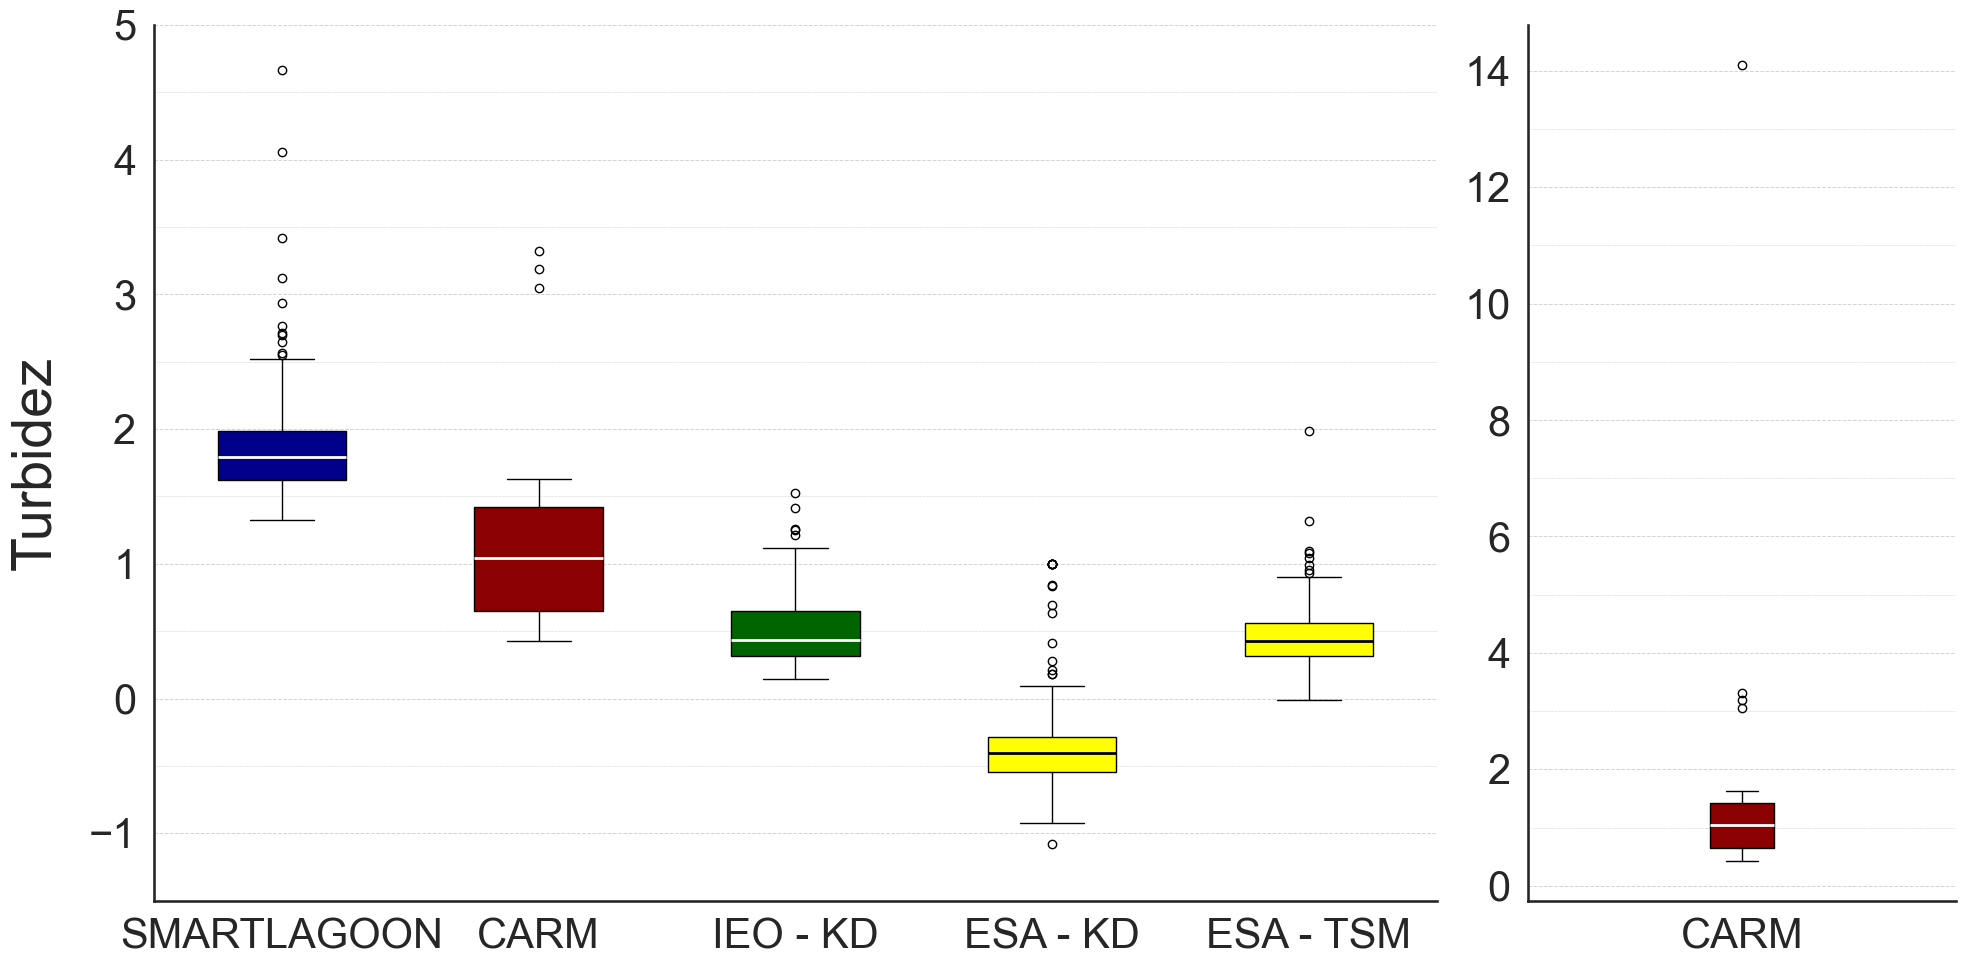

In [71]:
pintar_grafica_estadisticos_datos_turb(buoy_data, carm_data, ieo_data, satelite_data)

## Unificación de los datos

In [72]:
def tratar_fechas_duplicadas(all_data):
    # Obtener fechas duplicadas
    fechas_duplicadas = all_data[DATE][all_data.duplicated(DATE, keep=False)]
    fechas_unicas_duplicadas = fechas_duplicadas.drop_duplicates()

    for fecha in fechas_unicas_duplicadas:
        # Buscar las filas que tienen esas fechas
        filas = all_data[all_data[DATE] == fecha]
        filas = filas.reset_index(drop=True)

        # Si alguna de las filas es del organismo de la ESA, solo rellenar huecos de la otra fila
        if filas[TAG].str.contains('SATELITE').any() and len(filas) == 2:
            columns = filas.columns
            data = []
            
            for col in columns:
                if col is DATE:
                    data.append(filas[col][0])
                elif col is TAG:
                    data.append('MIXED')
                    pass
                
                elif filas[col].isna().sum() == 0: 
                    if filas[TAG][0] != 'SATELITE':
                        data.append(filas[col][0])
                    else:
                        data.append(filas[col][1])
                
                elif filas[col].isna().sum() == 1:
                    if np.isnan(filas[col][1]):
                        data.append(filas[col][0])
                    else:
                        data.append(filas[col][1])
                elif filas[col].isna().sum() == 2:
                    data.append(np.NaN)
            all_data = all_data[all_data[DATE] != filas[DATE][0]]

            new_data = pd.DataFrame([dict(zip(all_data.columns, data))])
            all_data = pd.concat([all_data, new_data], ignore_index=True)
        
        # Combinar los huecos entre las filas
        else:   
            columns = filas.columns.drop([DATE, TAG])
            for col in columns:
                # Se comprueba que todas las filas estén vacías menos 1
                if filas[col].isna().sum() < (len(filas) - 1):
                    tienen_nans = False
                    break
                else:
                    tienen_nans = True

            if tienen_nans:
                all_data = all_data[all_data[DATE] != fecha]
                filas = filas.drop(TAG, axis = 1)
                
                fila_combinada = filas.groupby(DATE).mean().reset_index()
                fila_combinada[TAG] = 'MIXED'
                
                all_data = pd.concat([all_data, fila_combinada], ignore_index=True)

    return all_data

def calcular_matriz_correlacion(datos, titulo, file_name):
    # Declaración variables
    ancho = 12 
    alto = 12

    file_name = f'figuras/{file_name}.svg'

    # Preparación datos
    extended_correlation_matrix = datos.corr()

    # Configuración del tamaño de fuente general
    sns.set_theme(context='talk', style='white')

    # Preparación gráfica
    fig, ax = plt.subplots(figsize=(ancho, alto))

    heatmap = sns.heatmap(
        extended_correlation_matrix, 
        annot=True, fmt='.2f', 
        cmap='coolwarm', square=True,
        annot_kws={'size': 30},
        linewidth=0.7,
        cbar_kws={'shrink': 0.8}
    )

    # Configuración a los ejes / grid
    ax.set_facecolor('white')
    ax.tick_params(axis='y', labelsize=22)
    ax.tick_params(axis='x', labelsize=22)
    
    # Configuración de las etiquetas de la barra de color
    colorbar = heatmap.collections[0].colorbar
    colorbar.ax.tick_params(labelsize=22)  # Cambia el tamaño de las etiquetas de los ticks
    colorbar.set_label('', size=25)  # Cambia el tamaño de la etiqueta de la barra de colores

    # Ajustar imagen
    plt.tight_layout()

    # Guardar imagen
    plt.savefig(file_name, format='svg')

    # Mostrar imagen
    plt.show()


def observar_correlacion_chla(data):
    # Obtener valores de clorofila a observar
    chla_data = data[[DATE,CHLA_MAX, CHLA_MIN, CHLA_MEAN, CHL_NN, CHL_OC, CHLA]]
    chla_data[DATE] = chla_data[DATE].dt.strftime(DATE_FORMAT) 
    chla_data = chla_data.set_index(DATE)
    
    # Filtrar el dataset para este intervalo de fechas
    fecha_inicio = '2022-10-15'
    fecha_fin = '2023-03-23'
    chla_data = chla_data.loc[fecha_inicio:fecha_fin]

    ## Calculando la matriz de correlación para la clorofila
    calcular_matriz_correlacion(chla_data, 'Matriz de Correlación para los Valores de Clorofila', 'matriz_correlacion_chla')
    
def observar_correlacion_turb(data):
    # Obtener valores de turbidez a observar
    turb_data = data[[DATE,TURB_MAX, TURB_MIN, TURB_MEAN, TURB, KD, TSM]]
    turb_data[DATE] = turb_data[DATE].dt.strftime(DATE_FORMAT) 
    turb_data = turb_data.set_index(DATE)
    
    # Filtrar el dataset para este intervalo de fechas
    fecha_inicio = '2022-10-15'
    fecha_fin = '2023-03-23'
    turb_data = turb_data.loc[fecha_inicio:fecha_fin]

    # Calculando la matriz de correlación para la turbidez
    calcular_matriz_correlacion(turb_data, 'Matriz de Correlación para los Valores de Turbidez', 'matriz_correlacion_turb')

def rellenar_valores_satelite(data):
    # Asignando los valores de clorofila de la ESA a chl_a que estuviera vacío (donde la columna 'TAG' contiene 'SATELITE')
    data.loc[data[TAG].str.contains('SATELITE', na=False), CHLA] = data[CHL_OC]

    # Eliminando las columnas CHL_NN y CHL_OC del dataset original
    data = data.drop(columns=[CHL_NN, CHL_OC])

    return data

def seleccionar_valores_smartlagoon_chla(data):
    # Asignando los valores de clorofila de SMARTLAGOON a chl_a que estuviera vacío (donde la columna 'TAG' contiene 'SMARTLAGOON')
    data.loc[data[TAG].str.contains('SMARTLAGOON', na=False), CHLA] = data[CHLA_MAX]

    # Eliminando las columnas CHL_{MIN, MAX, MEAN} del dataset original
    data = data.drop(columns=[CHLA_MIN, CHLA_MAX, CHLA_MEAN])

    return data

def seleccionar_valores_smartlagoon_turb(data):
    # Asignando los valores de turbidez de la ESA a la turb que estuviera vacío (donde la columna 'TAG' contiene 'SATELITE')
    data.loc[data[TAG].str.contains('SMARTLAGOON', na=False), CHLA] = data[TURB_MEAN]

    # Eliminando las columnas TURB_{MIN, MAX, MEAN} del dataset original
    data = data.drop(columns=[TURB_MIN, TURB_MAX, TURB_MEAN])

    return data

def unificar_datos(buoy_data, carm_data, ieo_data, satelite_data):
    # Unir todos los datos
    all_data = pd.concat([buoy_data, carm_data, ieo_data, satelite_data])

    # Ordenar por fechas y restablecer el índice
    all_data[DATE] = pd.to_datetime(all_data[DATE])
    all_data = all_data.sort_values(DATE)
    all_data = all_data.reset_index(drop=True)

    # Eliminar fechas duplicadas
    all_data = tratar_fechas_duplicadas(all_data)

    # Limpiar valores negativos incoherentes en este dataset
    for column in all_data.select_dtypes(include=[np.number]).columns:
        all_data[column] = np.where(all_data[column] < 0, np.nan, all_data[column])

    # Observar la correlación entre los valores de clorofila
    observar_correlacion_chla(all_data)
    # Seleccionar y desechar solo aquellos datos más correlados para unificar
    all_data = rellenar_valores_satelite(all_data)
    all_data = seleccionar_valores_smartlagoon_chla(all_data)

    # Observar la correlación entre los valores de turbidez
    observar_correlacion_turb(all_data)
    # Seleccionar y desechar solo aquellos datos más correlados para unificar
    all_data = seleccionar_valores_smartlagoon_turb(all_data)

    # Ordenar por fecha los valores de nuevo
    all_data[DATE] = pd.to_datetime(all_data[DATE])
    all_data = all_data.sort_values(DATE)

    
    # Establecer la fecha como índice
    all_data = all_data.set_index(DATE)

    # Generar un csv con todos los datos
    all_data.to_csv('all_data.csv')

    return all_data


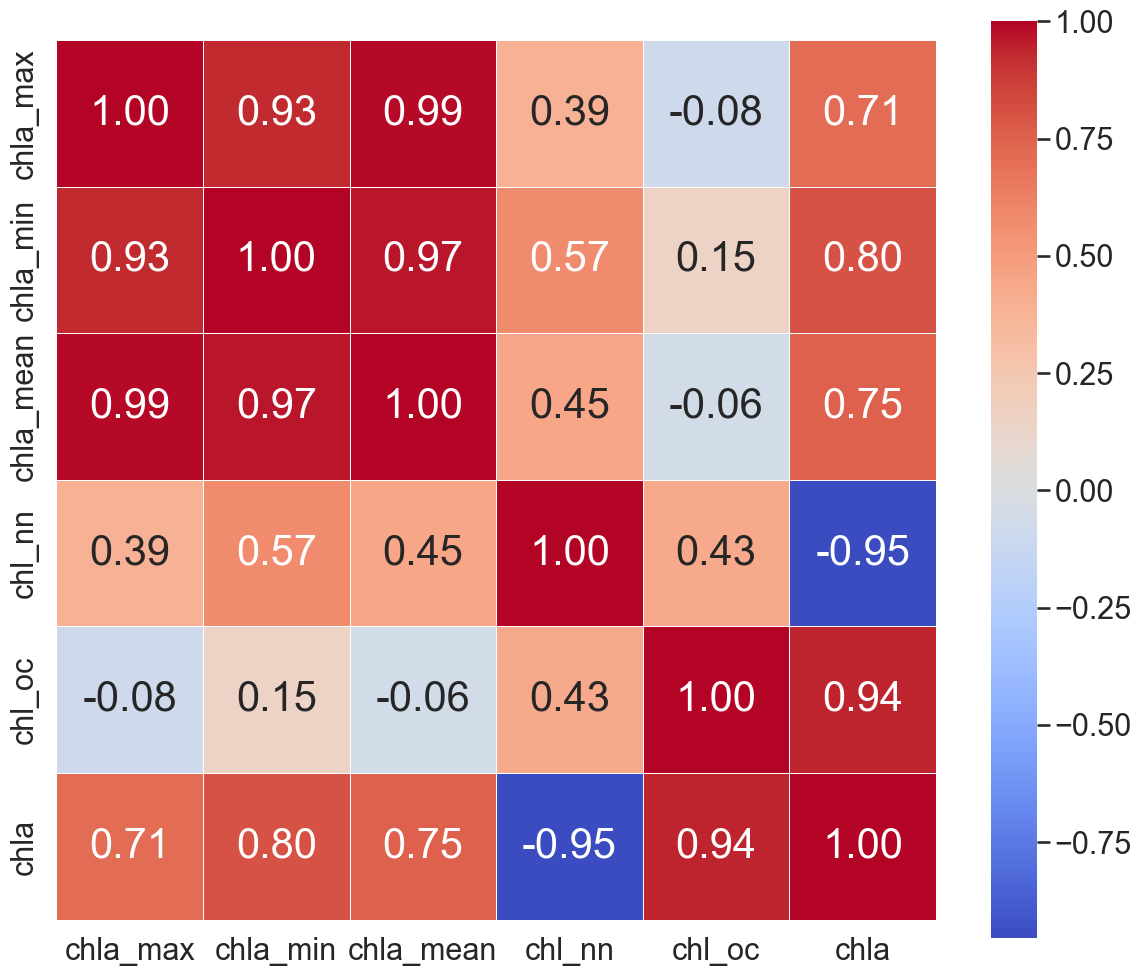

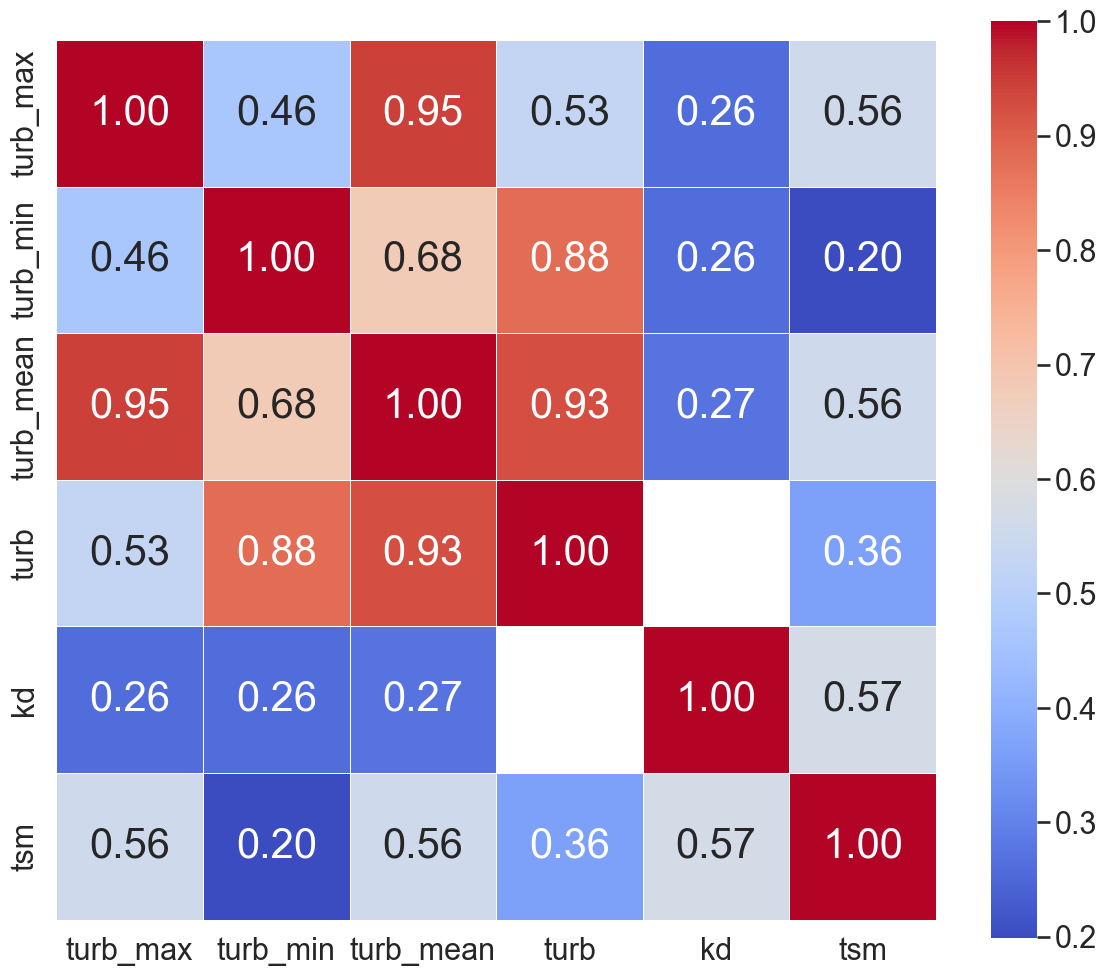

In [73]:
all_data = unificar_datos(buoy_data, carm_data, ieo_data, satelite_data)


In [74]:
def pintar_grafica_estadisticos_datos_todos(data):
    # Declaración variables
    ancho = 20 
    alto = 10

    label_y1 = 'Clorofila (mg/m3) / Turbidez'
    label_y2 = 'Clorofila (mg/m3)'
    titulo = 'Comparación de Niveles de Clorofila y Turbidez'
    titulo1 = ''
    titulo2 = ''

    colores1 = [CLR_CHLA, CLR_TURB, CLR_KD, CLR_TSM]
    median_colores1 = ['white','white', 'white', 'white']

    colores2 = [CLR_IEO]

    file_name = f'figuras/boxplot_todos.svg'

    # Preparación datos
    boxplot_data = [
        data[CHLA].dropna(), 
        data[TURB].dropna(), 
        data[KD].dropna(), 
        data[TSM].dropna()
    ]

    # Configuración de los colores y propiedades de la mediana  
    medianprops1 = dict(linestyle='-', linewidth=2)
    medianprops2 = dict(linestyle='-', linewidth=2, color = 'white')

    # Preparación gráfica
    fig, axs = plt.subplots(1, 2, figsize=(ancho, alto), gridspec_kw={'width_ratios': [3, 1]})
    # fig.suptitle(titulo, fontsize=20)
    
    # Primer boxplot
    box1 = axs[0].boxplot(boxplot_data, patch_artist=True, medianprops = medianprops1)

    # Configuración a los ejes / grid
        # Color de fondo
    axs[0].set_facecolor('white')

        # Configuración del grid
    axs[0].grid(True, color='lightgrey', linestyle='--', linewidth=0.7, axis='y', which='major')
    axs[0].yaxis.grid(True, color='lightgrey', linestyle='--', linewidth=0.4, which='minor')

        # Configuración de los ticks del eje y
    axs[0].yaxis.set_major_locator(ticker.MultipleLocator(1))   
    axs[0].yaxis.set_minor_locator(ticker.MultipleLocator(0.5)) 

    axs[0].set_ylim(-0.1, 4.05)

        # Configuración de los ticks del eje x
    axs[0].set_xticks([1, 2, 3, 4])

    # Configuración de las etiquetas
    axs[0].set_xticklabels(['CHLA', 'TURB', 'KD', 'TSM'], fontsize=30)
    axs[0].set_ylabel(label_y1, fontsize=40, labelpad=20)
    axs[0].set_title(titulo1)

    # Borrar líneas superior y derecha
    axs[0].spines['top'].set_visible(False)
    axs[0].spines['right'].set_visible(False)
    
    # Configuración colores 
    for patch, color in zip(box1['boxes'], colores1):
        patch.set_facecolor(color)
    for median, color in zip(box1['medians'], median_colores1):
        median.set_color(color)

    # Segundo boxplot
    box2 = axs[1].boxplot(data[CHLA].dropna(), patch_artist=True, medianprops = medianprops2)
    
    # Configuración a los ejes / grid
        # Color de fondo
    axs[1].set_facecolor('white')

        # Configuración del grid
    axs[1].grid(True, color='lightgrey', linestyle='--', linewidth=0.7, axis='y', which='major')
    axs[1].yaxis.grid(True, color='lightgrey', linestyle='--', linewidth=0.4, which='minor')

        # Configuración de los ticks del eje y
    axs[1].yaxis.set_major_locator(ticker.MultipleLocator(10))   
    axs[1].yaxis.set_minor_locator(ticker.MultipleLocator(5)) 

        # Configuración de los ticks del eje x
    axs[1].set_xticks([1])

    # Configuración de las etiquetas
    axs[1].set_xticklabels(['CHLA'], fontsize=30)
    # axs[1].set_ylabel(label_y2, fontsize=15, labelpad=15)
    axs[1].set_title(titulo2)
    
    # Borrar líneas superior y derecha
    axs[1].spines['top'].set_visible(False)
    axs[1].spines['right'].set_visible(False)

    axs[0].tick_params(axis='y', which='major', labelsize=30)  # Cambia '20' por el tamaño deseado
    # Configuración de los ticks del eje y para la segunda subgráfica
    axs[1].tick_params(axis='y', which='major', labelsize=30)  # Cambia '20' por el tamaño deseado
    
    # Configuración colores 
    for patch, color in zip(box2['boxes'], colores2):
        patch.set_facecolor(color)

    # Ajustar imagen
    plt.tight_layout()

    # Guardar imagen
    plt.savefig(file_name, format='svg')

    # Mostrar imagen
    plt.show()



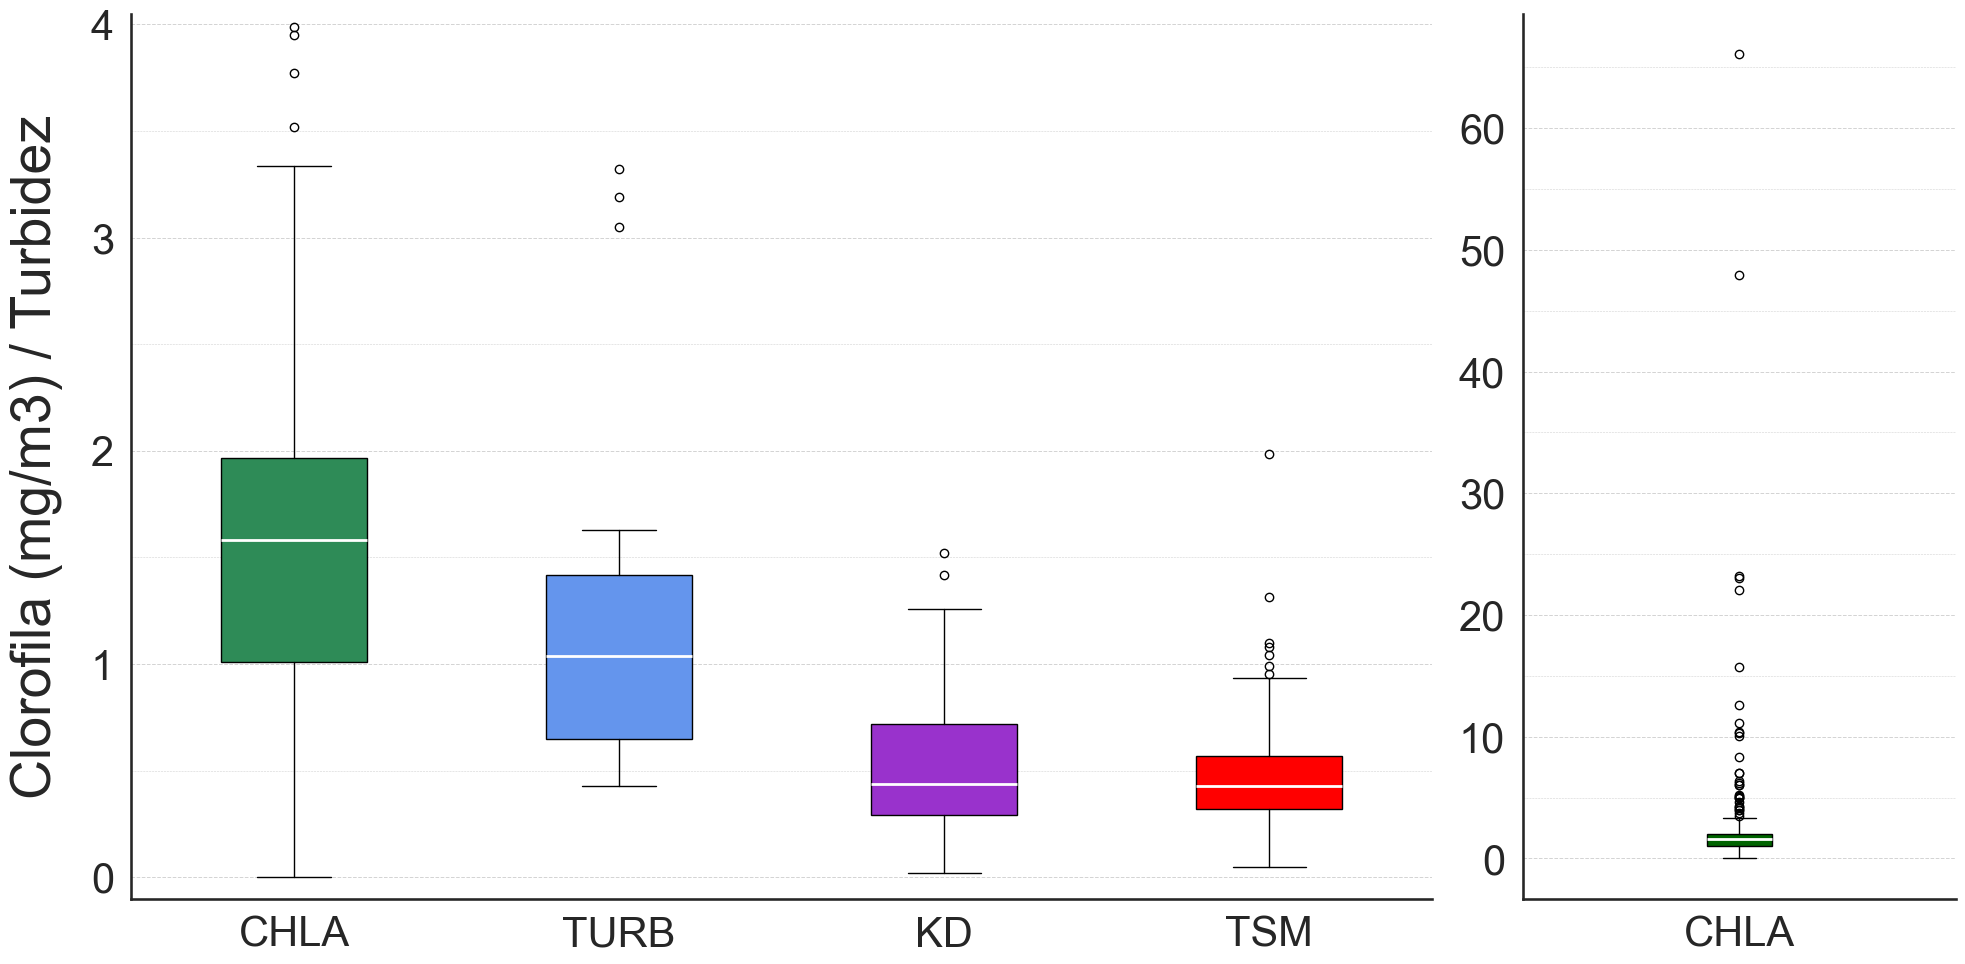

In [75]:
pintar_grafica_estadisticos_datos_todos(all_data)

## Estudio de los valores de turbidez, kd y tsm

In [76]:
study_data = all_data[[TURB, KD, TSM]]

In [77]:
study_data = study_data[~study_data[['turb', 'kd', 'tsm']].isna().all(axis=1)]

In [78]:
filtered_df = study_data.dropna(thresh=2)

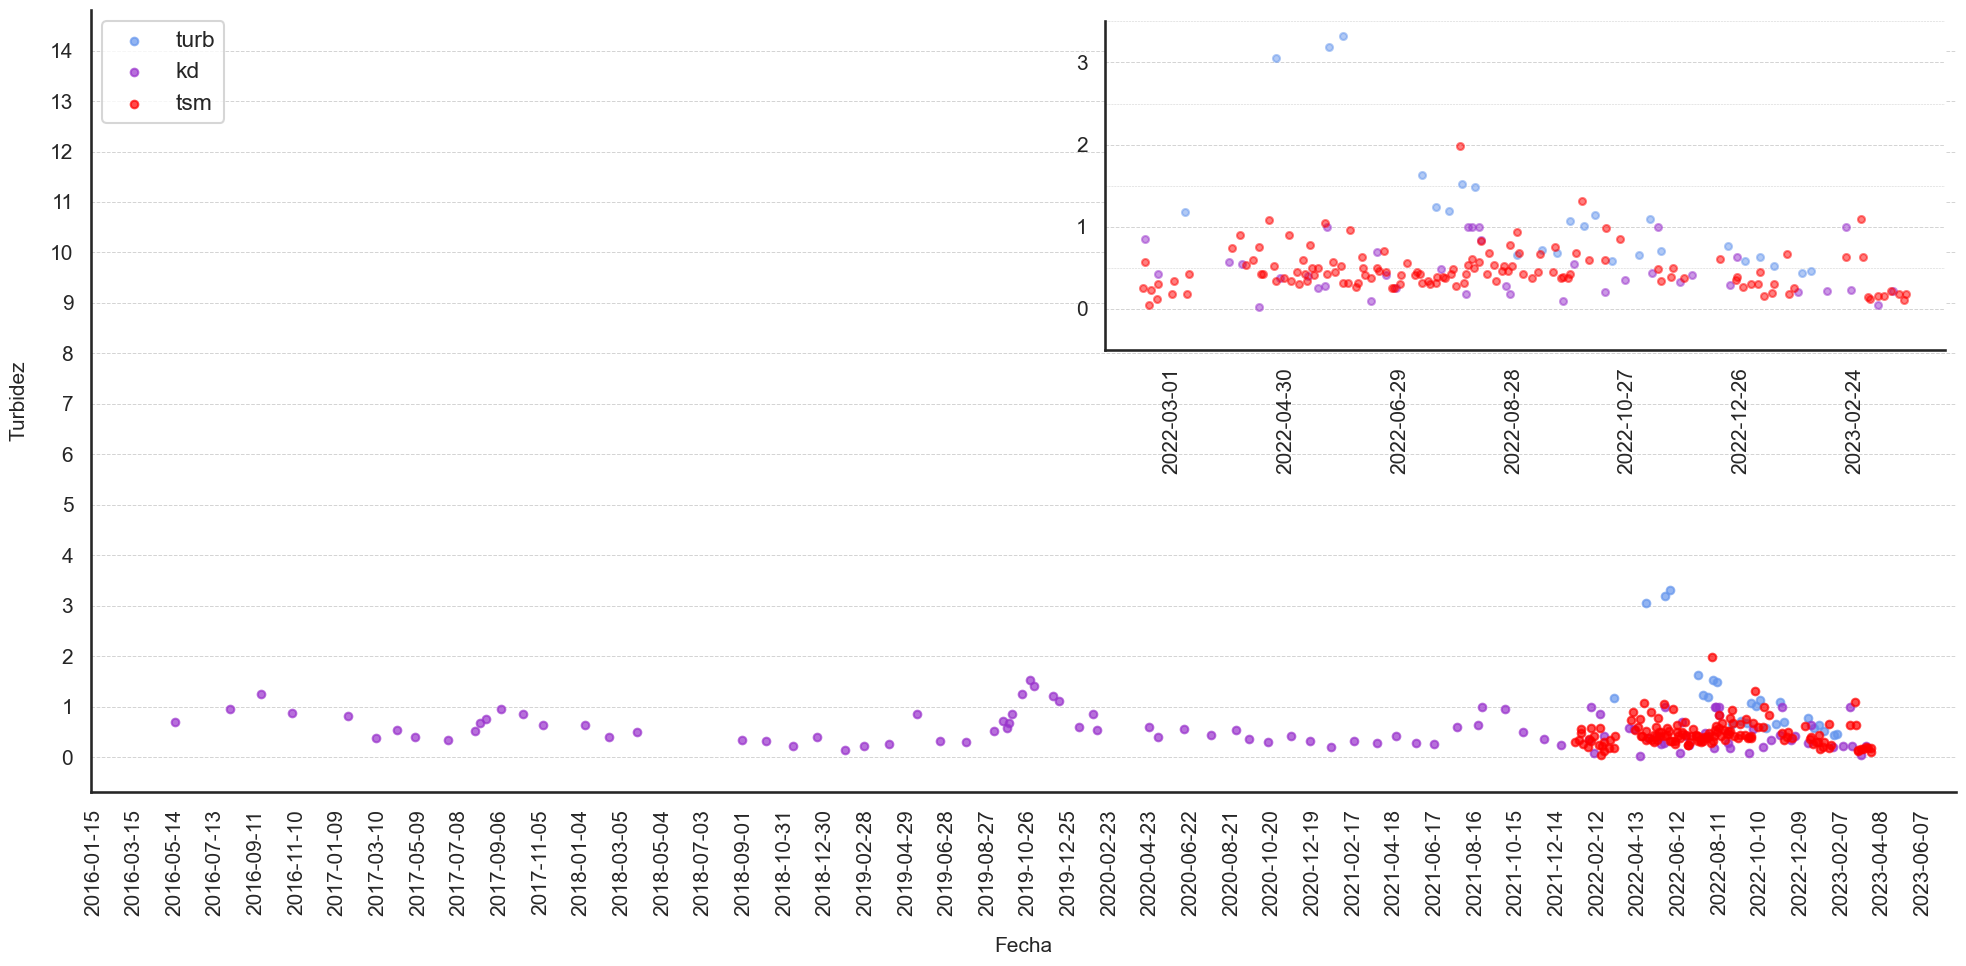

In [79]:
# Pintar gráfica
titulo = f'Dispersión de la Turbidez a lo largo del Tiempo'
datos = all_data
columnas = [TURB, KD, TSM]
colores = [CLR_TURB, CLR_KD, CLR_TSM]

alt_min_inset = -0.5
alt_max_inset = 3.5
y_min_grid = 2
y_max_grid = 1
file_name = 'dispersion_turb'
pintar_grafica_dispersion(titulo, datos, columnas, colores, 'Fecha','Turbidez', file_name, alt_min_inset, alt_max_inset, y_min_grid, y_max_grid)

In [80]:
turb_data = study_data[[TURB]]
turb_data = turb_data.dropna()
scaler = RobustScaler()
turb_data[TURB] = scaler.fit_transform(turb_data[[TURB]])


In [81]:
kd_data = study_data[[KD]]
kd_data = kd_data.dropna()
scaler = RobustScaler()
kd_data[KD] = scaler.fit_transform(kd_data[[KD]])


In [82]:
tsm_data = study_data[[TSM]]
tsm_data = tsm_data.dropna()
scaler = RobustScaler()
tsm_data[TSM] = scaler.fit_transform(tsm_data[[TSM]])


In [83]:
study_data = turb_data.join(kd_data, how='outer')

study_data = study_data.join(tsm_data, how='outer')

study_data.index = study_data.index.strftime('%Y-%m-%d')
study_data['turb-kd-tsm'] = study_data[['turb', 'kd', 'tsm']].mean(axis=1, skipna=True)

turb_data = study_data[['turb-kd-tsm']]


In [84]:
chla_data = all_data[[CHLA]]
chla_data.index = pd.to_datetime(chla_data.index)
chla_data.index = chla_data.index.strftime('%Y-%m-%d')


## Unificación posterior de los datos

In [85]:
df_merged = chla_data.join(turb_data, how='outer')


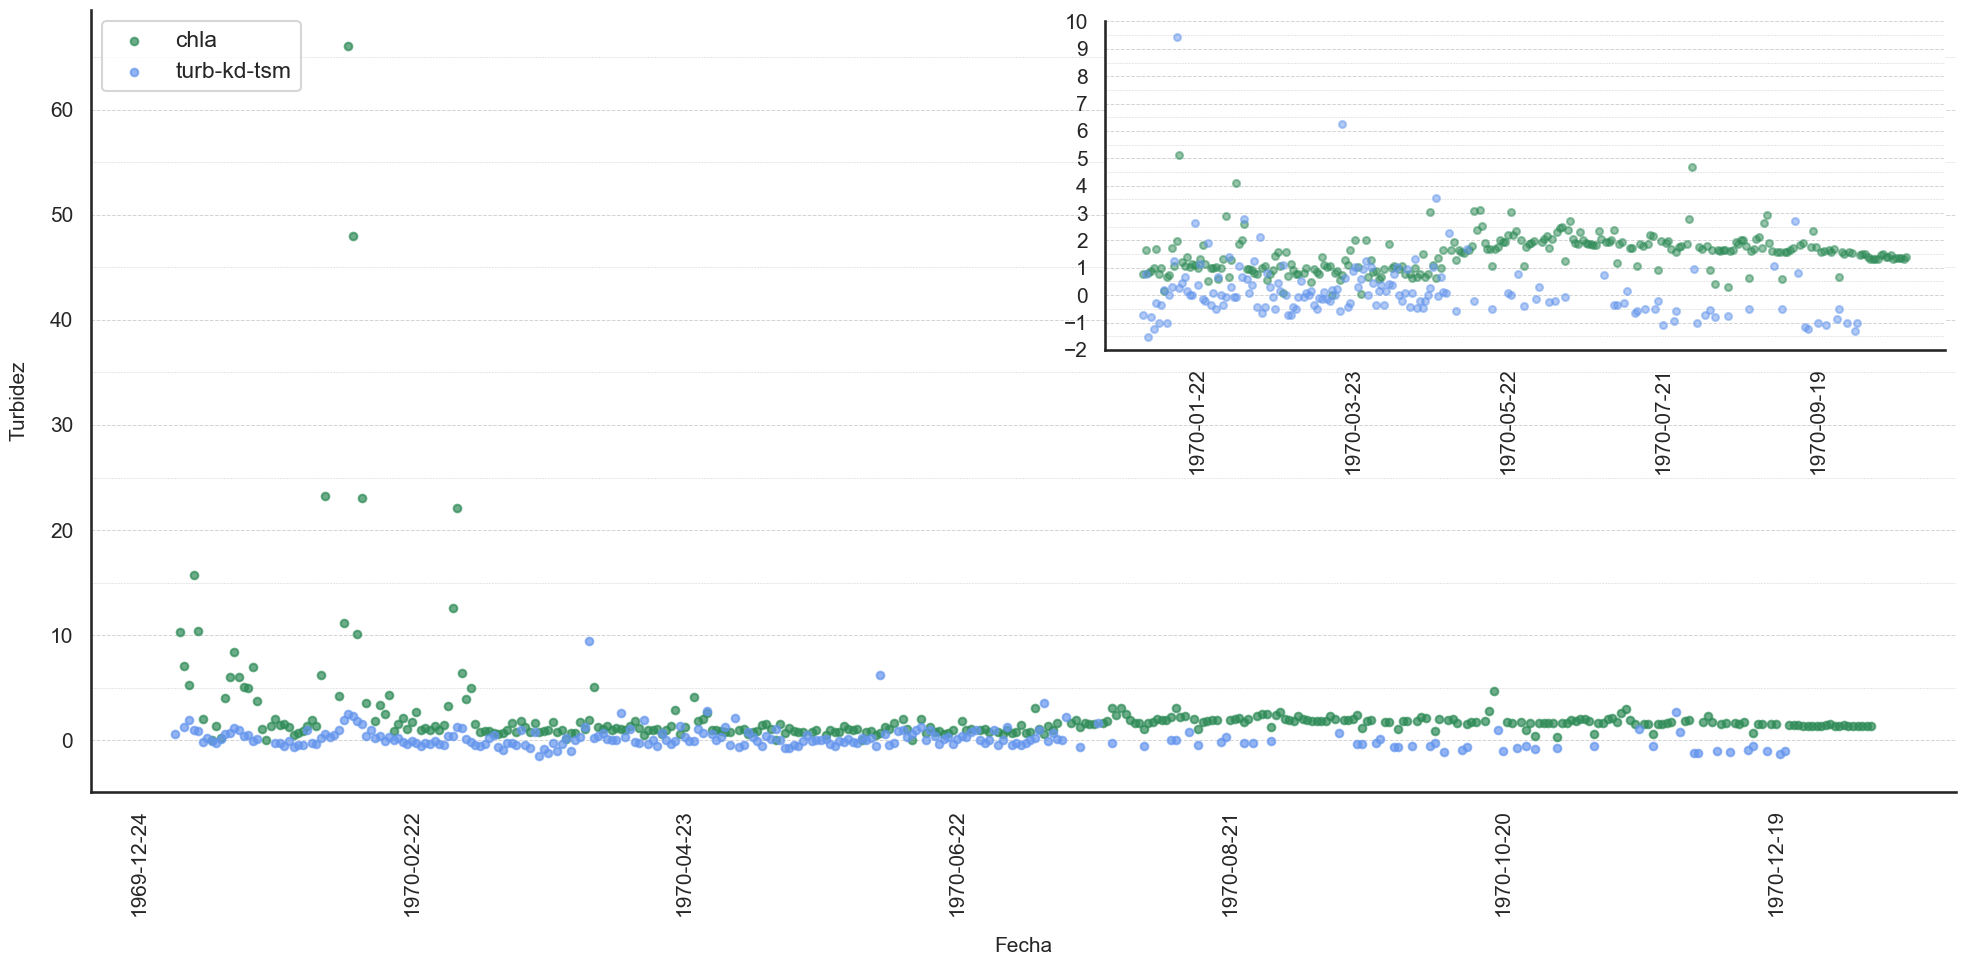

In [86]:
# Pintar gráfica
titulo = f'Dispersión de los parámetros a lo largo del Tiempo'
datos = df_merged
columnas = [CHLA, "turb-kd-tsm"]
colores = [CLR_CHLA, CLR_TURB]

alt_min_inset = -2
alt_max_inset = 10
y_min_grid = 5
y_max_grid = 10
file_name = 'dispersion_todos'
pintar_grafica_dispersion(titulo, datos, columnas, colores, 'Fecha','Turbidez', file_name, alt_min_inset, alt_max_inset, y_min_grid, y_max_grid)